Kütüphaneleri ve Veri Kümelerini İçe Aktar¶

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
import os
from pathlib import Path

import random

import glob as gb  
import pydicom as dicom
from pydicom import dcmread

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots

from IPython.display import display_html

Veri Analizi

In [2]:
train = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')
test = pd.read_csv("/kaggle/input/rsna-breast-cancer-detection/test.csv")


In [3]:
# Veri setinin genel özeti
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [4]:
# Sayısal sütunlar için temel istatistiksel özet
print(train.describe())


            site_id    patient_id      image_id           age        cancer  \
count  54706.000000  54706.000000  5.470600e+04  54669.000000  54706.000000   
mean       1.460407  32698.865262  1.079386e+09     58.543928      0.021168   
std        0.498434  18893.861534  6.183269e+08     10.050884      0.143944   
min        1.000000      5.000000  6.849100e+04     26.000000      0.000000   
25%        1.000000  16481.000000  5.458153e+08     51.000000      0.000000   
50%        1.000000  32432.000000  1.082689e+09     59.000000      0.000000   
75%        2.000000  48999.000000  1.613228e+09     66.000000      0.000000   
max        2.000000  65534.000000  2.147472e+09     89.000000      1.000000   

             biopsy      invasive        BIRADS       implant    machine_id  
count  54706.000000  54706.000000  26286.000000  54706.000000  54706.000000  
mean       0.054272      0.014953      0.772350      0.026999     54.618378  
std        0.226556      0.121365      0.590062      0

In [5]:
# Eksik veri kontrolü
missing_values = train.isnull().sum()

In [6]:
# Sadece eksik veri içeren sütunları gösterelim
missing_values = missing_values[missing_values > 0]
print("Eksik Veri Sayıları:")
print(missing_values)

Eksik Veri Sayıları:
age           37
BIRADS     28420
density    25236
dtype: int64


In [7]:
print(f"\033[1mNumber of records in the dataset is : {train.shape[0]}, and number of Unique Records : {train.patient_id.nunique()}\033[0m")

Number of records in the dataset is : 54706, and number of Unique Records : 11913


In [8]:
train.isnull().sum().to_frame(name='Number of Null Values').style.background_gradient(cmap='afmhot_r')

,Number of Null Values
site_id,0
patient_id,0
image_id,0
laterality,0
view,0
age,37
cancer,0
biopsy,0
invasive,0
BIRADS,28420


In [9]:
test.isnull().sum().sum()

0

eğitim verilerinde BIRADS var, yoğunlukta %45'ten fazla boş değer var, test verilerinde boş değer yok

In [10]:
# Sütunların veri tiplerine bakalım
print(train.dtypes)


site_id                      int64
patient_id                   int64
image_id                     int64
laterality                  object
view                        object
age                        float64
cancer                       int64
biopsy                       int64
invasive                     int64
BIRADS                     float64
implant                      int64
density                     object
machine_id                   int64
difficult_negative_case       bool
dtype: object


In [11]:
# 3️⃣ Kontrol: Eksik veri kaldı mı?
print(train.isnull().sum())


site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64


In [12]:
print('Train Data')
display(train.head())
print('Test Data')
test.head()

Train Data


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in less

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning:

invalid value encountered in greater



,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


Test Data


,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


Yaş Analizi

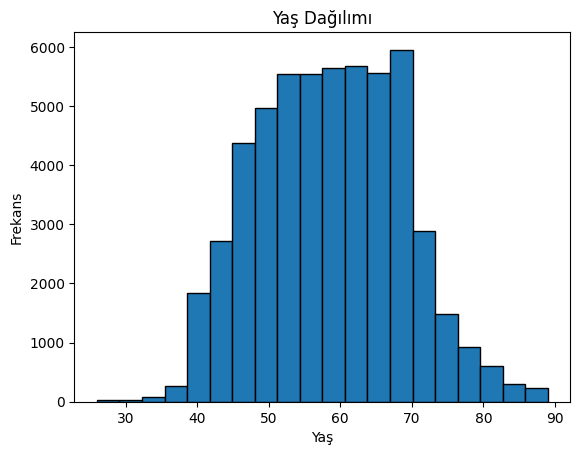

In [13]:
# Yaş dağılımını görselleştirelim
plt.hist(train['age'].dropna(), bins=20, edgecolor='black')
plt.title('Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



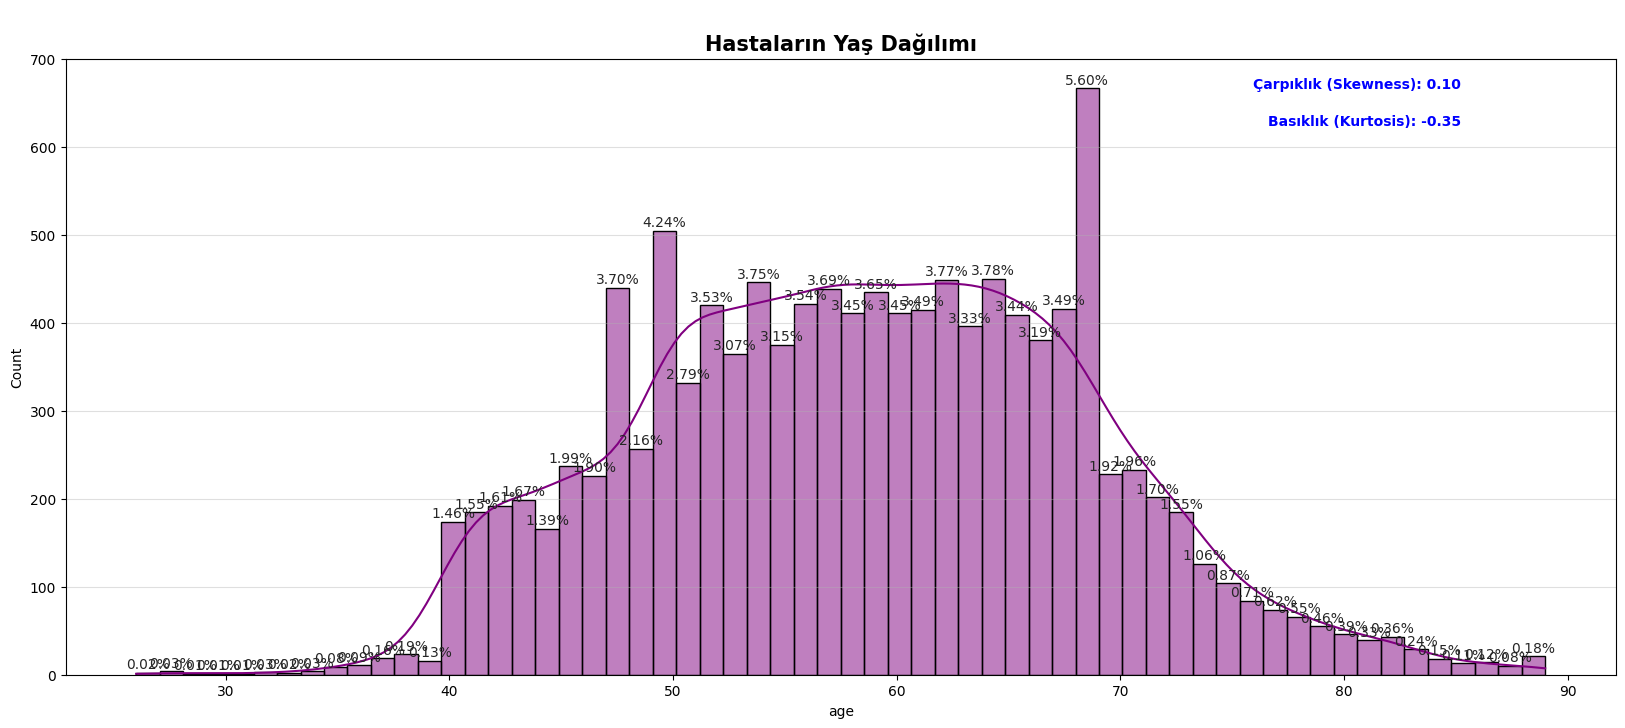

In [14]:
# Sonsuz (inf) değerleri NaN olarak değiştir
train.replace([np.inf, -np.inf], np.nan, inplace=True)

# Eksik olmayan (NaN olmayan) yaş verilerini al ve hasta ID'sine göre gruplandır
age_df = train[train.age.notnull()].groupby('patient_id')['age'].apply(lambda x: np.unique(x)[0])

# Grafik boyutunu ayarla
plt.figure(figsize=(20, 8))

# Yaş dağılımının histogramını çiz
ax = sns.histplot(age_df, bins=60, kde=True, color='purple')  

# Y ekseni için grid çizgileri ekle
ax.grid(axis='y', linestyle='-', alpha=0.4)  

# Seaborn stilini "whitegrid" olarak ayarla
sns.set_style("whitegrid")  

# Skewness (çarpıklık) ve kurtosis (basıklık) değerlerini grafiğe ekle
ax.text(x=0.9, y=0.97, transform=ax.transAxes, 
        s=f"Çarpıklık (Skewness): {age_df.skew():.2f}", 
        fontsize=10, color='blue', fontweight='bold', 
        verticalalignment='top', horizontalalignment='right')

ax.text(x=0.9, y=0.91, transform=ax.transAxes, 
        s=f"Basıklık (Kurtosis): {age_df.kurt():.2f}", 
        fontsize=10, color='blue', fontweight='bold', 
        verticalalignment='top', horizontalalignment='right')

# Histogramın her çubuğu için yüzde değerlerini ekleyelim
for p in ax.patches:
    if p.get_height() > 0:  # Yüksekliği 0 olan çubuklara yazı yazma
        yüzde = f'{100 * p.get_height() / age_df.shape[0]:.2f}%\n'
        plt.annotate(yüzde, 
                     (p.get_x() + p.get_width() / 2, p.get_height()), 
                     ha='center', va='center')

# Başlığı ekleyelim
ax.set_title("\nHastaların Yaş Dağılımı", fontsize=15, fontweight='bold')

# Grafiği göster
plt.show()


In [15]:
fig = px.box(age_df)
fig.show()

Yaş pozitif bir eğime sahip ancak sadece 0.103443 ve basıklık -0.354158
Yaşın medyan değeri 59 ve 67-69 arasında bir yaş zirvesi var.

Kanser Durum Analizi

In [16]:
def highlightcol(val):
    if val == 1:
        color = 'red'
    elif val == 0:
        color = 'green'
    else:
        color = 'orange'
    return 'color: %s' % color

<ipython-input-17-398ef00c17c7>:11: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



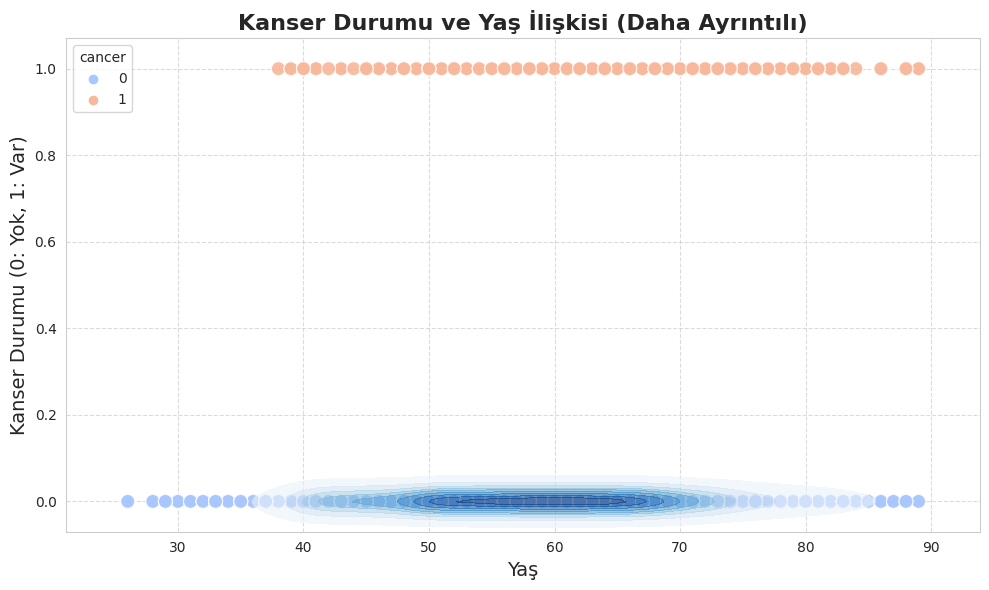

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Veri noktalarının üzerine etiketler ekleyerek ve kanser durumu ile yaş arasındaki ilişkiyi daha ayrıntılı gösterelim
plt.figure(figsize=(10,6))

# Scatter plot, kanser durumu (0 ve 1) ile yaş arasındaki ilişkiyi gösterir
sns.scatterplot(x='age', y='cancer', data=train, hue='cancer', palette='coolwarm', s=100, alpha=0.7, edgecolor='w', marker='o')

# Yaşın belirli aralıklarına göre çizgi ekleme
sns.kdeplot(x=train['age'], y=train['cancer'], cmap='Blues', shade=True, levels=10, alpha=0.6)

# Başlık ve etiketler
plt.title('Kanser Durumu ve Yaş İlişkisi (Daha Ayrıntılı)', fontsize=16, fontweight='bold')
plt.xlabel('Yaş', fontsize=14)
plt.ylabel('Kanser Durumu (0: Yok, 1: Var)', fontsize=14)

# Grafik üzerinde grid ekleme
plt.grid(True, linestyle='--', alpha=0.7)

# Grafik üzerine yaş ve kanser durumu hakkında bilgi ekleme
plt.tight_layout()

# Grafiği gösterme
plt.show()


-----------------------------------------------------
** Kanser Durumu (Cancer) Sütununun Dağılımı **
-----------------------------------------------------
Kanser Durumu:
 0: Kanser Yok
 1: Kanser Var

cancer
0    53548
1     1158
Name: count, dtype: int64 

-----------------------------------------------------
** Biyopsi Durumu (Biopsy) Sütununun Dağılımı **
-----------------------------------------------------
Biyopsi Durumu:
 0: Biyopsi Yapılmamış
 1: Biyopsi Yapılmış

biopsy
0    51737
1     2969
Name: count, dtype: int64 



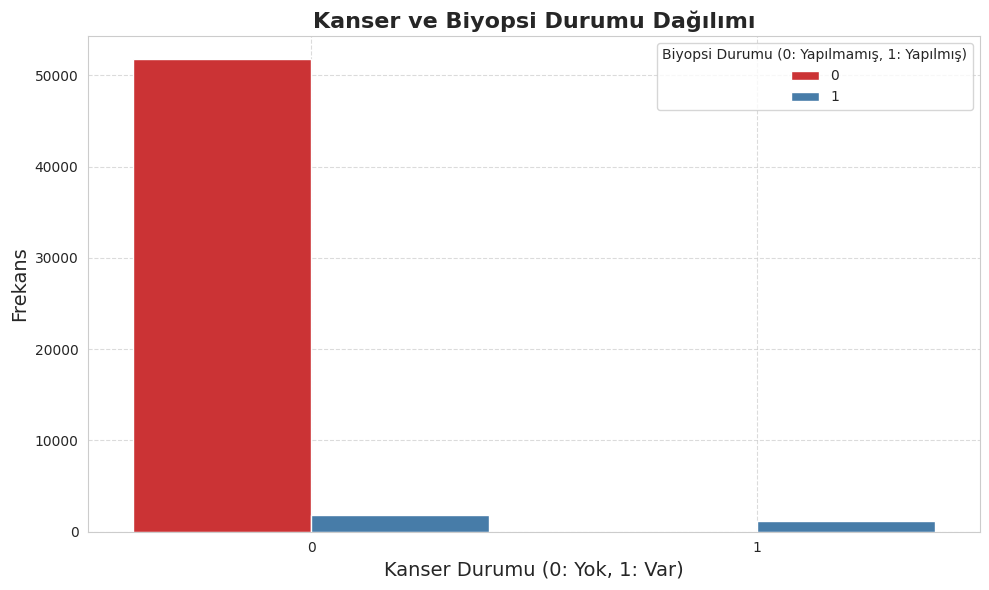

In [18]:
# 'Cancer' ve 'Biopsy' sütunlarının dağılımını görselleştirelim

# Cancer ve Biopsy sütunlarının dağılımını yazdıralım
print("-----------------------------------------------------")
print("** Kanser Durumu (Cancer) Sütununun Dağılımı **")
print("-----------------------------------------------------")
print(f"Kanser Durumu:\n 0: Kanser Yok\n 1: Kanser Var\n")
print(train['cancer'].value_counts(), "\n")

print("-----------------------------------------------------")
print("** Biyopsi Durumu (Biopsy) Sütununun Dağılımı **")
print("-----------------------------------------------------")
print(f"Biyopsi Durumu:\n 0: Biyopsi Yapılmamış\n 1: Biyopsi Yapılmış\n")
print(train['biopsy'].value_counts(), "\n")

# Kanser durumu ve biyopsi yapılanlar arasındaki ilişkiyi gösterelim
# Biyopsi ve kanser durumu arasındaki ilişkiyi daha ayrıntılı incelemek için
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi görselleştirelim
plt.figure(figsize=(10,6))
sns.countplot(x='cancer', hue='biopsy', data=train, palette='Set1')

# Başlık ve etiketler
plt.title('Kanser ve Biyopsi Durumu Dağılımı', fontsize=16, fontweight='bold')
plt.xlabel('Kanser Durumu (0: Yok, 1: Var)', fontsize=14)
plt.ylabel('Frekans', fontsize=14)
plt.legend(title='Biyopsi Durumu (0: Yapılmamış, 1: Yapılmış)', loc='upper right')

# Grafik üzerinde grid ekleme
plt.grid(True, linestyle='--', alpha=0.7)

# Grafiği gösterme
plt.tight_layout()
plt.show()


In [19]:
# Hasta ID'sine göre gruplandırarak 'cancer' sütununda kaç farklı değer olduğuna bak
non_unique = train.groupby('patient_id').cancer.transform('nunique').ne(1)

# Hem kanserli (1) hem de kansersiz (0) değeri olan hastaları filtrele
cancer_notunique = train[non_unique]

# Bu hastaların sayısını ekrana yazdır
display_html(f"<h3><br/>Kanser durumu hem True (1) hem de False (0) olan {cancer_notunique.patient_id.nunique()} hasta bulunmaktadır.</h3>", raw=True)

# Örnek veri setini ekrana yazdır
display_html(f"<h4><br/>Örnek Veri</h4>", raw=True)
display(cancer_notunique[cancer_notunique['patient_id'] == cancer_notunique.patient_id.unique()[0]].style.applymap(highlightcol, subset=pd.IndexSlice[:, ['cancer']]))

# Hasta görüntülerinin sıralı olduğu varsayılarak analiz yapıldığını belirt
display_html(f"<h3><br/>Bu 480 örnek veri için zaman bilgisi bulunmadığından, hasta görüntü ID'leri sıralı olarak ele alınarak analiz yapılacaktır.</h3>", raw=True)

# Kanseri tamamen geçen ve hâlâ kanseri olan hasta sayıları için değişkenler
completely_cured = 0
still_have_cancer = 0
cured_list = []
still_have_cancer_list = []

# Tüm hastalar için kanser durumunu kontrol et
for i in range(len(cancer_notunique.patient_id.unique())):
    list_0 = []  # Kanserin olmadığı (0) görüntü ID'leri
    list_1 = []  # Kanserin olduğu (1) görüntü ID'leri
    
    # İlgili hasta verilerini al
    temp = cancer_notunique[cancer_notunique['patient_id'] == cancer_notunique.patient_id.unique()[i]]
    
    # Kanser durumu olmayan ve olan görüntüleri listele
    list_0 = temp[temp['cancer'] == 0]['image_id']
    list_1 = temp[temp['cancer'] == 1]['image_id']
    
    # Eğer kanserli (1) görüntülerin tümü, kansersiz (0) görüntülerinden önce geliyorsa, tamamen iyileşmiş kabul edilir
    if all(i < max(list_0) for i in list_1):
        completely_cured += 1
        cured_list.append(max(list_0))  # Son kanser görüntüsü eklendi
    else:
        still_have_cancer += 1
        still_have_cancer_list.append(max(list_1))  # Son kanserli görüntü eklendi

# Kaç hastanın tamamen iyileştiğini ve kaç hastanın hâlâ kanseri olduğunu ekrana yazdır
display_html(f"<h3><br/>Bu 480 örnek veri içinde {completely_cured} hasta tamamen iyileşmiş, {still_have_cancer} hasta ise hâlâ kanserli durumdadır.</h3>", raw=True)

# **Tamamen iyileşen hastaların verisini al**
temp_cured = train[train['image_id'].isin(cured_list)]

# **Tamamen iyileşen hastaların tablosunu oluştur**
fig = go.Figure(data=[go.Table(
    header=dict(values=['site_id', 'patient_id', 'image_id', 'cancer'], fill_color='hotpink'),
    cells=dict(values=[
        temp_cured[temp_cured.columns[0]], 
        temp_cured[temp_cured.columns[1]], 
        temp_cured[temp_cured.columns[2]], 
        temp_cured[temp_cured.columns[6]]
    ], fill_color='lightgreen')
)])

fig.update_layout(title="480 Örnekte Tamamen İyileşen Hastaların Son Görüntü ID'leri ve Kanser Durumları")
fig.show()

# **Hâlâ kanseri olan hastaların verisini al**
temp_uncured = train[train['image_id'].isin(still_have_cancer_list)]

# **Hâlâ kanseri olan hastaların tablosunu oluştur**
fig = go.Figure(data=[go.Table(
    header=dict(values=['site_id', 'patient_id', 'image_id', 'cancer'], fill_color='pink'),
    cells=dict(values=[
        temp_uncured[temp_uncured.columns[0]], 
        temp_uncured[temp_uncured.columns[1]], 
        temp_uncured[temp_uncured.columns[2]], 
        temp_uncured[temp_uncured.columns[6]]
    ], fill_color='skyblue')
)])

fig.update_layout(title="480 Örnekte Hâlâ Kanseri Olan Hastaların Son Görüntü ID'leri ve Kanser Durumları")
fig.show()


Kanser durumu hem True (1) hem de False (0) olan 480 hasta bulunmaktadır.

Örnek Veri

<ipython-input-19-cb0d0f4d9bd8>:12: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
87,1,10130,388811999,L,MLO,71.000000,1,1,1,0.000000,0,B,49,False
88,1,10130,613462606,L,CC,71.000000,1,1,1,0.000000,0,B,49,False
89,1,10130,1360338805,L,CC,71.000000,1,1,1,0.000000,0,B,49,False
90,1,10130,1672636630,L,MLO,71.000000,1,1,1,0.000000,0,B,49,False
91,1,10130,1013166704,R,CC,71.000000,0,0,0,nan,0,B,49,False
92,1,10130,1165309236,R,CC,71.000000,0,0,0,nan,0,B,49,False
93,1,10130,2110820077,R,MLO,71.000000,0,0,0,nan,0,B,49,False


Bu 480 örnek veri için zaman bilgisi bulunmadığından, hasta görüntü ID'leri sıralı olarak ele alınarak analiz yapılacaktır.

Bu 480 örnek veri içinde 235 hasta tamamen iyileşmiş, 245 hasta ise hâlâ kanserli durumdadır.

In [20]:
# Benzersiz (tek tip) kanser verisine sahip hastaları filtrele
cancer_unique_df = train[~non_unique]

# Her hastanın kanser değerinin tek bir tür olup olmadığını kontrol et
print(cancer_unique_df.groupby('patient_id').cancer.nunique().unique())

# Gerekli sütunları seçerek yeni bir DataFrame oluştur
cancer_unique = cancer_unique_df[['patient_id', 'cancer']]

# Aynı hastaya ait tekrar eden satırları kaldır (ilk görüleni tut)
cancer_unique.drop_duplicates(keep='first', inplace=True)


[1]


In [21]:
# Sayım değişkenlerini başlatma
counter_0_1_0_1 = 0  # 0 → 1 → 0 → 1 olan hasta sayısı
counter_0_0_1_1 = 0  # 0 → 0 → 1 → 1 olan hasta sayısı
c_0 = 0  # Kanser başlangıç değeri 0 olan hasta sayısı
c_1 = 0  # Kanser başlangıç değeri 1 olan hasta sayısı
list_c_0 = []  # Kanser başlangıç değeri 0 olan hastaların listesi
list_c_1 = []  # Kanser başlangıç değeri 1 olan hastaların listesi
list_counter_0_1_0_1 = []  # 0 → 1 → 0 → 1 geçişini yapan hastaların listesi
list_counter_0_0_1_1 = []  # 0 → 0 → 1 → 1 geçişini yapan hastaların listesi
count = 0  # Diğer durumları saymak için

# 480 örnek içinde iyileşmemiş hastaları içeren bir DataFrame oluşturma
temp_df = train[train['patient_id'].isin(temp_uncured['patient_id'])][['patient_id', 'image_id', 'cancer']]

# Tüm eşsiz hastalar için döngü başlatma
for i in range(len(temp_df.patient_id.unique())):
    # Hastaya ait tüm görüntü ID'lerini al
    list_image = temp_df[temp_df['patient_id'] == temp_df.patient_id.unique()[i]]['image_id']
    
    # Kanser durumu 0 olan hastanın görüntü ID'lerini al
    list_0 = temp_df[(temp_df['cancer'] == 0) & (temp_df['patient_id'] == temp_df.patient_id.unique()[i])]['image_id']
    
    # Kanser durumu 1 olan hastanın görüntü ID'lerini al
    list_1 = temp_df[(temp_df['cancer'] == 1) & (temp_df['patient_id'] == temp_df.patient_id.unique()[i])]['image_id']
    
    # Hastaya ait en küçük `image_id` değerine sahip kanser bilgisini al
    c = temp_df[temp_df['image_id'] == min(list_image)]['cancer']
    
    # Eğer hastanın ilk kanser değeri 0 ise
    if c.values[0] == 0:
        c_0 += 1  # 0 ile başlayan hasta sayısını artır
        list_c_0.append(temp_df.patient_id.unique()[i])  # Hastayı listeye ekle

        # Eğer en büyük 0 değeri, en küçük 1 değerinden büyükse (0 → 1 → 0 → 1 geçişi olmuş)
        if max(list_0) > min(list_1):
            counter_0_1_0_1 += 1
            list_counter_0_1_0_1.append(temp_df.patient_id.unique()[i])

        # Eğer en büyük 0 değeri, en küçük 1 değerinden küçükse (0 → 0 → 1 → 1 geçişi olmuş)
        elif max(list_0) < min(list_1):
            counter_0_0_1_1 += 1
            list_counter_0_0_1_1.append(temp_df.patient_id.unique()[i])

        else:
            count += 1  # Diğer durumlar için sayaç artırılır

    # Eğer hastanın ilk kanser değeri 1 ise
    else:
        c_1 += 1  # 1 ile başlayan hasta sayısını artır
        list_c_1.append(temp_df.patient_id.unique()[i])  # Hastayı listeye ekle


In [22]:
# Yeni bir DataFrame oluşturma
cancer_df = pd.DataFrame()

# Kanser durumu kategorilerini tanımlama
cancer_df['Patients Cancer Status'] = [
    'Cancer Stats False from Beginning', 
    'Cancer Stats True from Beginning', 
    'Completely Cured', 
    'Cancer Stats False Turned True then False, Finally True', 
    'Cancer Stats Turned True', 
    'Cancer Stats True Turned False, Finally True'
]

# Her kategoriye ait hasta sayısını ekleme
cancer_df['Count'] = [
    cancer_unique.cancer.value_counts().values[0],  # Başlangıçta kanseri olmayan hastalar
    cancer_unique.cancer.value_counts().values[1],  # Başlangıçta kanseri olan hastalar
    completely_cured,  # Tam iyileşmiş hasta sayısı
    counter_0_1_0_1,   # 0 → 1 → 0 → 1 geçişini yapmış hasta sayısı
    counter_0_0_1_1,   # 0 → 0 → 1 → 1 geçişini yapmış hasta sayısı
    c_1                # 1 ile başlayan hasta sayısı
]

# İndeks olarak 'Patients Cancer Status' sütununu ayarlama
cancer_df.set_index(cancer_df.columns[0], inplace=True)

# Kanser durumu değişmeyen hastaların yüzdesi
cancer_status_not_Changed = ((11427 + 6) / cancer_df['Count'].sum() * 100)

# Kanser durumu değişen hastaların yüzdesi
cancer_status_changed = ((235 + 90 + 66 + 89) / cancer_df['Count'].sum() * 100)


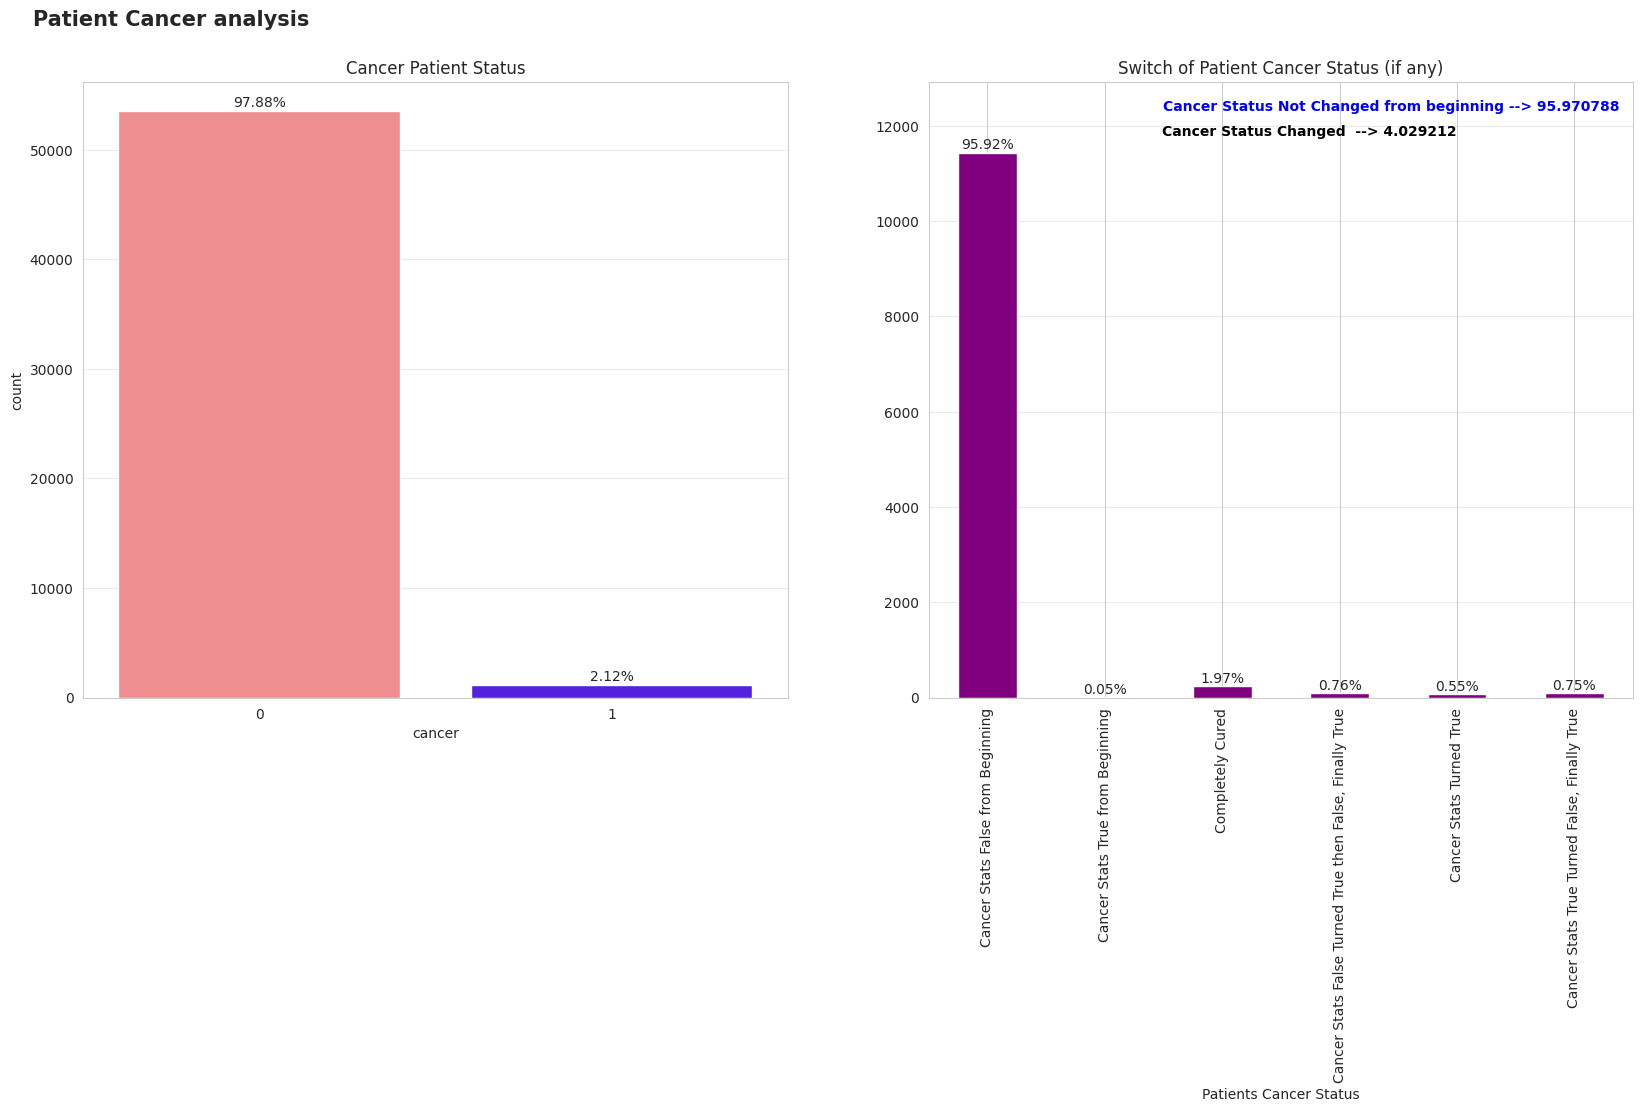

In [23]:
# İki alt grafik oluşturuluyor
fig, ax = plt.subplots(1, 2, figsize=(20,8))
fig.text(0.1, 0.95, "Patient Cancer analysis ", fontsize=15, fontweight='bold')  # Başlık ekleniyor

# Soldaki grafikte, kanser durumunun sayısını çizme
sns.countplot(x="cancer", data=train, palette="gnuplot2_r", ax=ax[0])

# Sağdaki grafikte, kanser durumu değişimini bar grafik olarak çizme
ax[1] = cancer_df['Count'].plot(kind="bar", color='purple')

# Grafiklerde stil ayarları
for i, ax in enumerate(ax.flatten()):
    ax.grid(axis='y', linestyle='-', alpha=0.4)  # Y ekseni için grid çizgileri
    if i == 0:  # Soldaki grafik
        t = train.shape[0]
        ax.set_title('Cancer Patient Status')
    else:  # Sağdaki grafik
        t = cancer_df['Count'].sum()
        ax.set_ylim(0, cancer_df['Count'].max() + 1500)
        ax.set_title('Switch of Patient Cancer Status (if any)')
        
        # Kanser durumu değişmeyen ve değişen hastaların yüzdelerini ekleme
        ax.text(x=0.98, y=0.97, transform=ax.transAxes, s="Cancer Status Not Changed from beginning --> %f" % cancer_status_not_Changed, fontsize=10, color='blue', fontweight='bold', verticalalignment='top', horizontalalignment='right')
        ax.text(x=0.75, y=0.93, transform=ax.transAxes, s="Cancer Status Changed  --> %f" % cancer_status_changed , fontsize=10, color='black', fontweight='bold', verticalalignment='top', horizontalalignment='right')

    # Her bir barın üzerine yüzdelik değerleri ekleme
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / t:.2f}%\n'  # Yüzde hesaplama
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')  # Yüzdelik değeri barın üzerine ekleme

# Grafiklerin görüntülenmesi
plt.show()


Veri kümesinde kanser durumu Yanlış olan hastaların %95,92'si var; bu nedenle, oldukça dengesiz

Hastaların %0,05'inin kanser durumu Doğru, bu aynı kalıyor.

Hastaların %1,97'si kanserden kurtuldu.

Hastaların %0,55'inin kanser durumu Yanlış'tan Doğru'ya döndü.

Durumları Doğru olan hastaların %0,75'inin durumu Yanlış'a döndü, sonra en sonunda Doğru'ya döndü.

Durumları Yanlış olan hastaların %0,76'sının durumu Doğru'ya döndü, sonra Yanlış'a döndü ve en sonunda Doğru'ya döndü.


Hastaya Göre Alınan Görüntü Sayısı

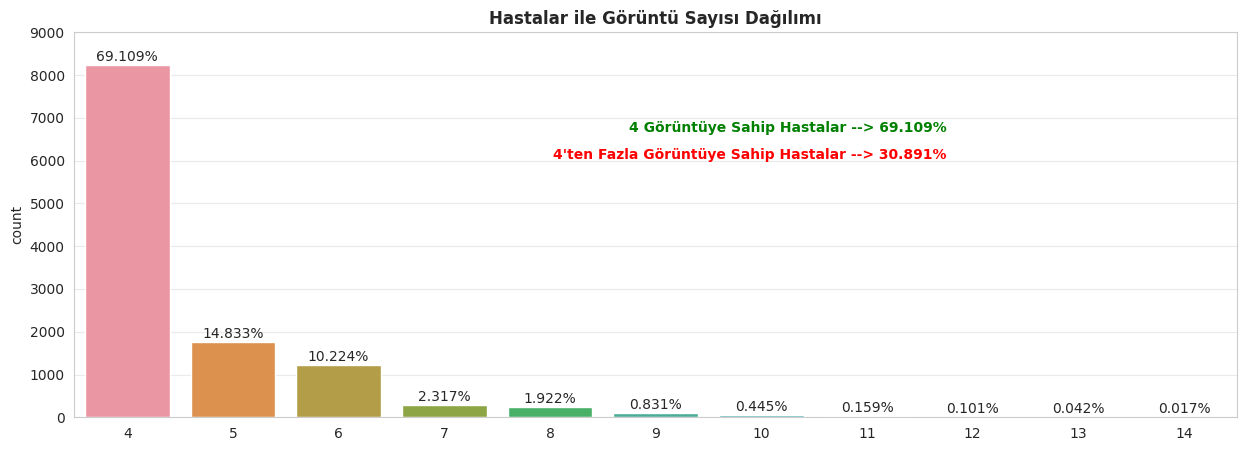

In [24]:
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

# Uyarı mesajlarını görmezden gel
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Grafik boyutlarını ayarla (genişlik 15, yükseklik 5)
plt.figure(figsize=(15,5))

# 'train' DataFrame'inde her hastanın sahip olduğu görüntü sayısını gruplandır ve bu sayıları countplot ile görselleştir
image_counts = train.groupby('patient_id').size()  # Hastalarına göre görüntü sayısını gruplandır
ax = sns.countplot(x=image_counts)  # `image_counts` verisini x eksenine uygula

# Hastaların benzersiz sayısını al ve başlık ekle
t = train['patient_id'].nunique()
ax.set_title('Hastalar ile Görüntü Sayısı Dağılımı', fontweight='bold')

# Y ekseninin sınırlarını belirle (0 ile 9000 arasında)
ax.set_ylim(0, 9000)

# Her bir bar için, yüksekliğine orantılı olarak yüzde değerini ekle
for p in ax.patches:
    # Yüzde hesapla ve etiketi ekle
    percentage = f'{100 * p.get_height() / t:.3f}%\n'
    x = p.get_x() + p.get_width() / 2  # Bar'ın ortasını bul
    y = p.get_height()  # Bar'ın yüksekliğini al
    ax.annotate(percentage, (x, y), ha='center', va='center')  # Yüzdeyi bar'ın üzerine ekle

# Y ekseninde grid ekle (dikey çizgiler)
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Ekstra metin ekle: 4 görüntüye sahip hastalar için yüzde değeri
ax.text(x=0.75, y=0.77, transform=ax.transAxes, 
        s="4 Görüntüye Sahip Hastalar --> 69.109%", 
        fontsize=10, color='green', fontweight='bold', 
        verticalalignment='top', horizontalalignment='right')

# Ekstra metin ekle: 4'ten fazla görüntüye sahip hastalar için yüzde değeri
ax.text(x=0.75, y=0.70, transform=ax.transAxes, 
        s="4'ten Fazla Görüntüye Sahip Hastalar --> 30.891%", 
        fontsize=10, color='red', fontweight='bold', 
        verticalalignment='top', horizontalalignment='right')

# Grafiği göster
plt.show()


Hastaların %69.109'u için çekilen görüntü sayısı 4'tür ve geri kalan %30.891'i için çekilen görüntü sayısı 4'ten fazladır.

Çekilen görüntü sayısının şunlarla bir ilişkisi olup olmadığını kontrol edelim:

Hastanın kanser durumu
Hastaların ziyaret ettiği yer

Görüntü Analizi Hasta Kanser Durumuna Göre

cured_list -> completely cured data list_c_0.append(temp_df.patient_id.unique()[i]) - > Patients with starting 0 then 1 then 0 then 1 list_counter_0_1_0_1.append(temp_df.patient_id.unique()[i]) - > 0 1 0 1 list_counter_0_0_1_1.append(temp_df.patient_id.unique()[i]) -> 0 0 1 1 list_c_1.append(temp_df.patient_id.unique()[i]) - > Provide patients having starting 1 and in between 0 and finally then 1

In [25]:
# Kanser teşhisi yapılmamış hastaları içeren dataframe
# 'cancer_unique' DataFrame'inde kanser teşhisi 0 (yok) olan hastaların 'patient_id' değerlerine göre 'train' DataFrame'inden filtreleme yapılır
cancer_false_df = train[train['patient_id'].isin(cancer_unique[cancer_unique['cancer']==0]['patient_id'].unique())]

# Kanser teşhisi yapılmış hastaları içeren dataframe
# 'cancer_unique' DataFrame'inde kanser teşhisi 1 (var) olan hastaların 'patient_id' değerlerine göre 'train' DataFrame'inden filtreleme yapılır
cancer_true_df = train[train['patient_id'].isin(cancer_unique[cancer_unique['cancer']==1]['patient_id'].unique())]

# Tamamen iyileşmiş hastaları içeren dataframe
# 'cured_list' içerisinde yer alan 'image_id' değerlerine sahip hastaların 'patient_id' değerlerine göre 'train' DataFrame'inden filtreleme yapılır
completely_cured_df = train[train['patient_id'].isin(train[train['image_id'].isin(cured_list)]['patient_id'].unique())]

# Hem kanser teşhisi yapılmış hem de 0 ve 1 değerleri arasında belirli bir desen izleyen hastaları içeren dataframe
# 'list_counter_0_1_0_1' listesindeki 'patient_id' değerlerine göre 'train' DataFrame'inden filtreleme yapılır
cancer_0_1_0_1_df = train[train['patient_id'].isin(list_counter_0_1_0_1)]

# Hem kanser teşhisi yapılmamış hem de 0 ve 1 değerleri arasında başka bir desen izleyen hastaları içeren dataframe
# 'list_counter_0_0_1_1' listesindeki 'patient_id' değerlerine göre 'train' DataFrame'inden filtreleme yapılır
cancer_0_0_1_1_df = train[train['patient_id'].isin(list_counter_0_0_1_1)]

# Kanser teşhisi yapılmış ve 1 ve 0 değerleri arasında bir desen izleyen hastaları içeren dataframe
# 'list_c_1' listesindeki 'patient_id' değerlerine göre 'train' DataFrame'inden filtreleme yapılır
cancer_1_0_1_df = train[train['patient_id'].isin(list_c_1)]


In [26]:
# Kanser hastalarının durumunu ve çekilen görüntülerle olan ilişkisini analiz etmek için aşağıdaki detaylar da kullanılacaktır
# HTML formatında bir başlık yazdırılır
display_html("<h3><br/>Hasta kanser durumu ile çekilen görüntüler arasındaki ilişkiyi analiz etmek için aşağıdaki detaylar da kullanılacaktır", raw=True)

# 'Count' sütunu üzerinden normalize edilmiş değerler hesaplanır ve 'Normalize' sütununa eklenir
# Bu işlem, her bir hastanın sayısını toplam hastaların sayısına bölüp % cinsinden normalize eder
cancer_df['Normalize'] = cancer_df['Count'] / cancer_df['Count'].sum() * 100

# 'cancer_df' DataFrame'inin görsel sunumunu geliştirmek için 'viridis_r' renk paletiyle arka plan renkleri gradyan olarak ayarlanır
cancer_df.style.background_gradient(cmap='viridis_r')


Hasta kanser durumu ile çekilen görüntüler arasındaki ilişkiyi analiz etmek için aşağıdaki detaylar da kullanılacaktır

,Count,Normalize
Patients Cancer Status,,
Cancer Stats False from Beginning,11427,95.920423
Cancer Stats True from Beginning,6,0.050365
Completely Cured,235,1.972635
"Cancer Stats False Turned True then False, Finally True",90,0.755477
Cancer Stats Turned True,66,0.554017
"Cancer Stats True Turned False, Finally True",89,0.747083


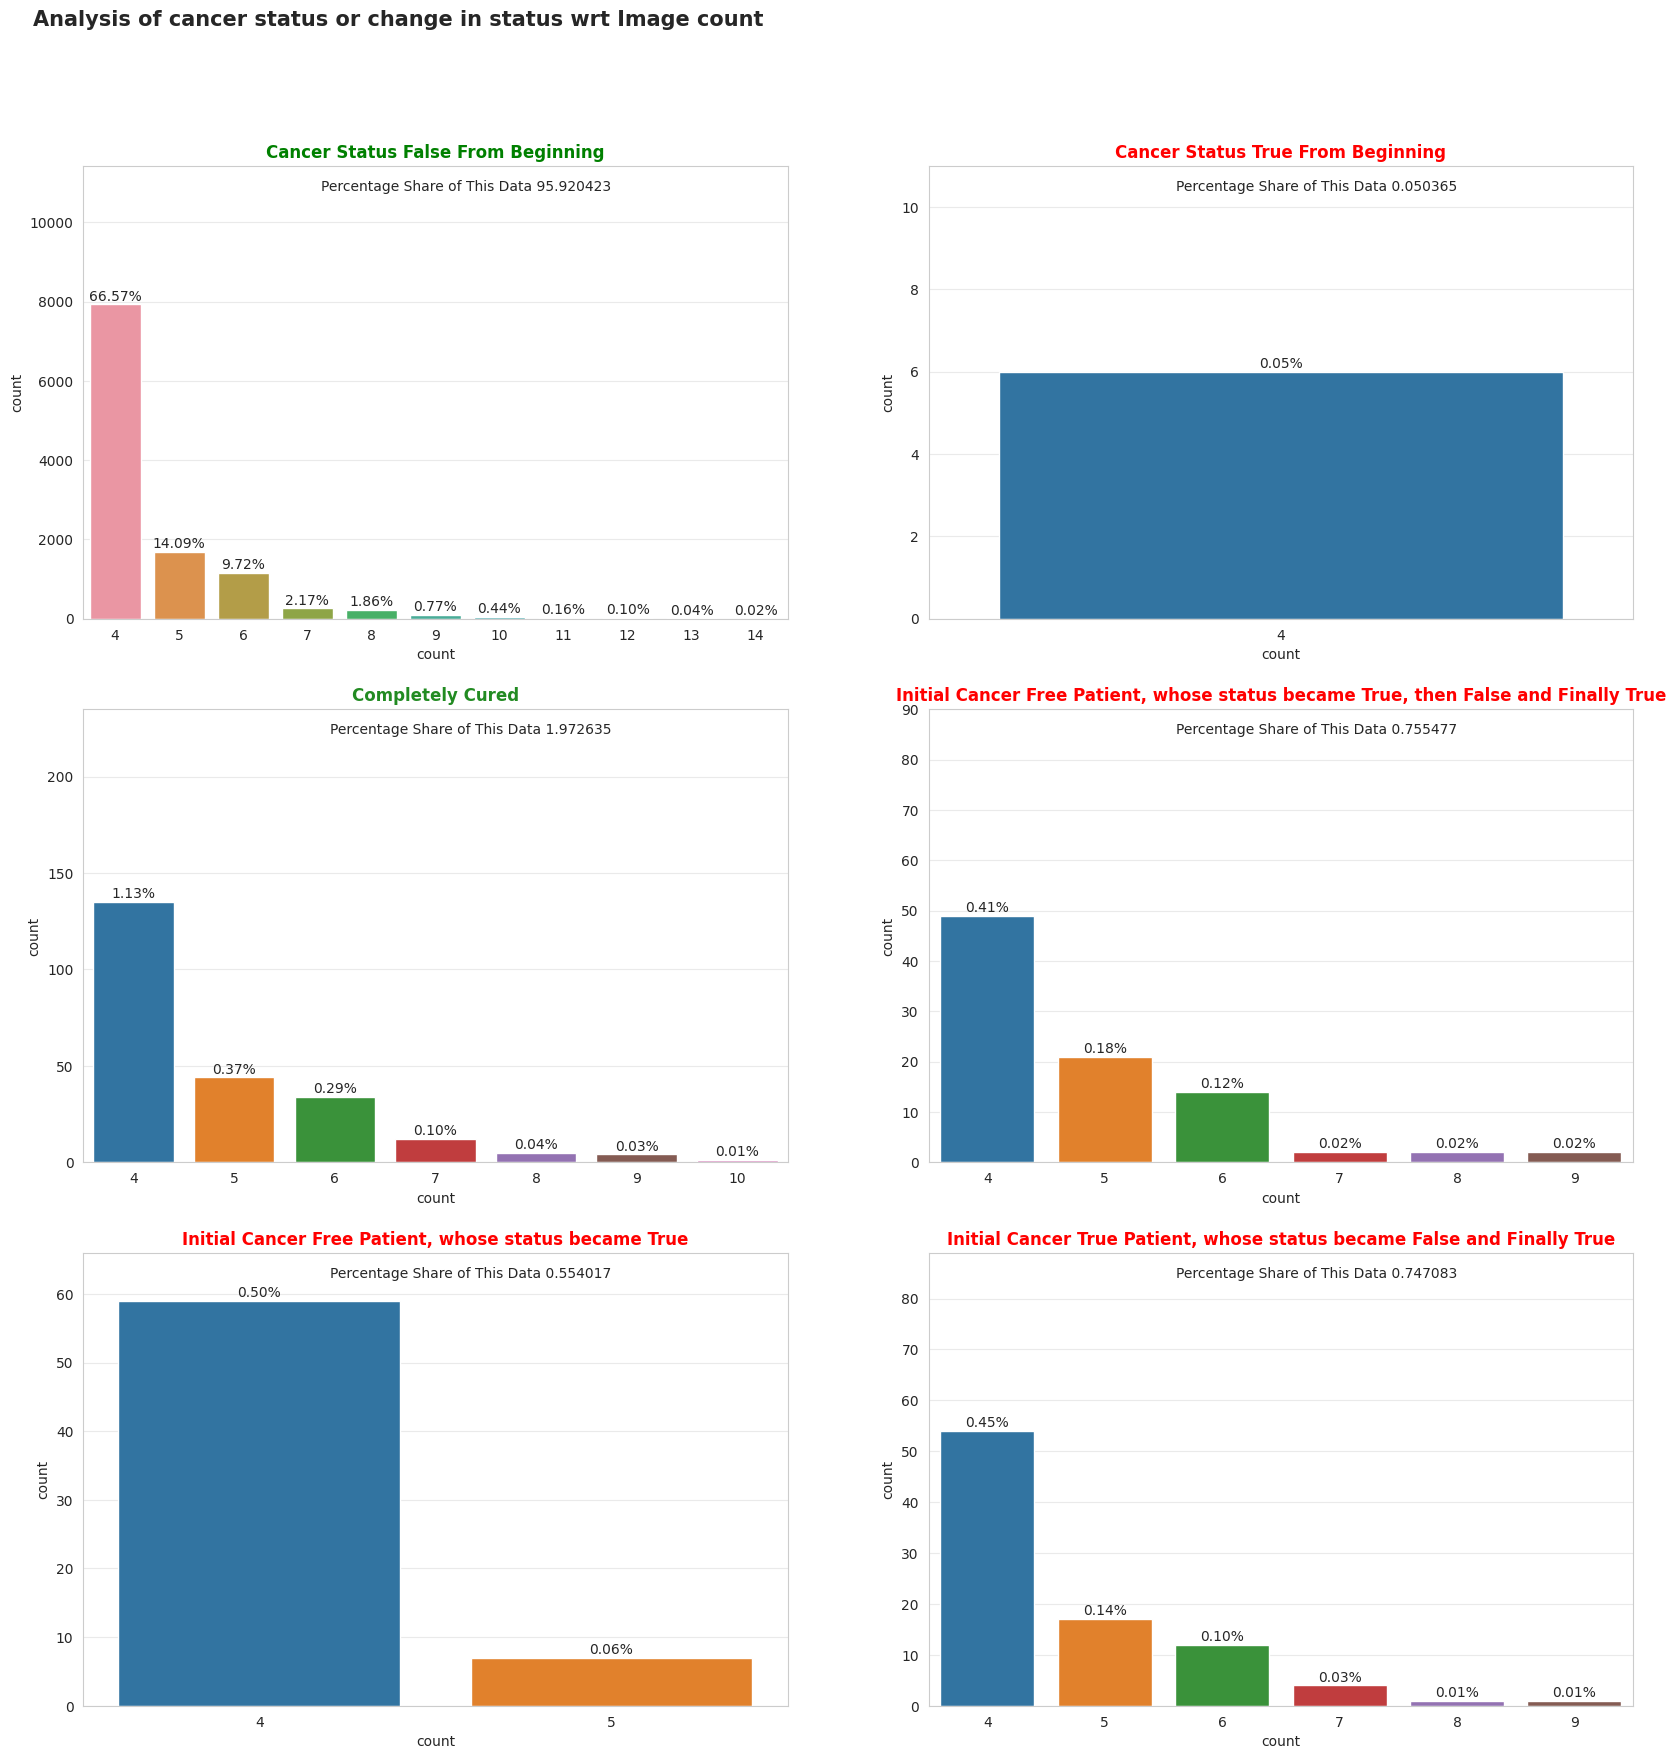

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subplotlar oluşturuluyor
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
fig.text(0.1, 0.95, "Analysis of cancer status or change in status wrt Image count", fontsize=15, fontweight='bold')  

# Her bir grup için countplot grafiklerini çizeriz
sns.countplot(data=cancer_false_df.groupby('patient_id').size().reset_index(name='count'), x='count', ax=ax[0, 0])  # Kanser durumu yanlış olan hastalar
sns.countplot(data=cancer_true_df.groupby('patient_id').size().reset_index(name='count'), x='count', ax=ax[0, 1])   # Kanser durumu doğru olan hastalar
sns.countplot(data=completely_cured_df.groupby('patient_id').size().reset_index(name='count'), x='count', ax=ax[1, 0])  # Tamamen iyileşen hastalar
sns.countplot(data=cancer_0_1_0_1_df.groupby('patient_id').size().reset_index(name='count'), x='count', ax=ax[1, 1])  # Durumu değişen hastalar
sns.countplot(data=cancer_0_0_1_1_df.groupby('patient_id').size().reset_index(name='count'), x='count', ax=ax[2, 0])  # Durumu değişen hastalar
sns.countplot(data=cancer_1_0_1_df.groupby('patient_id').size().reset_index(name='count'), x='count', ax=ax[2, 1])  # Durumu değişen hastalar

# Toplam hasta sayısı
t = train.patient_id.nunique()

# Her bir subplot üzerinde ayarlamalar yapılır
for i, ax in enumerate(ax.flatten()):
    ax.grid(axis='y', linestyle='-', alpha=0.4)  # Y ekseninde grid gösterimi yapılır
    
    # Başlık ve metin eklemeleri yapılır
    if i == 0:   
        ax.set_ylim(0, cancer_false_df.patient_id.nunique())
        ax.set_title('Cancer Status False From Beginning', fontweight='bold', color='green')
        ax.text(x=0.75, y=0.97, transform=ax.transAxes, s="Percentage Share of This Data %f" % cancer_df['Normalize'].values[0], fontsize=10, verticalalignment='top', horizontalalignment='right')
    elif i == 1:
        ax.set_ylim(0, cancer_true_df.patient_id.nunique() + 5)
        ax.set_title('Cancer Status True From Beginning', fontweight='bold', color='red')
        ax.text(x=0.75, y=0.97, transform=ax.transAxes, s="Percentage Share of This Data %f" % cancer_df['Normalize'].values[1], fontsize=10, verticalalignment='top', horizontalalignment='right')
    elif i == 2:
        ax.set_ylim(0, completely_cured_df.patient_id.nunique())
        ax.set_title('Completely Cured', fontweight='bold', color='forestgreen')
        ax.text(x=0.75, y=0.97, transform=ax.transAxes, s="Percentage Share of This Data %f" % cancer_df['Normalize'].values[2], fontsize=10, verticalalignment='top', horizontalalignment='right')        
    elif i == 3:
        ax.set_ylim(0, cancer_0_1_0_1_df.patient_id.nunique())
        ax.set_title('Initial Cancer Free Patient, whose status became True, then False and Finally True', fontweight='bold', color='red')
        ax.text(x=0.75, y=0.97, transform=ax.transAxes, s="Percentage Share of This Data %f" % cancer_df['Normalize'].values[3], fontsize=10, verticalalignment='top', horizontalalignment='right')        
    elif i == 4:
        ax.set_ylim(0, cancer_0_0_1_1_df.patient_id.nunique())
        ax.set_title('Initial Cancer Free Patient, whose status became True', fontweight='bold', color='red')
        ax.text(x=0.75, y=0.97, transform=ax.transAxes, s="Percentage Share of This Data %f" % cancer_df['Normalize'].values[4], fontsize=10, verticalalignment='top', horizontalalignment='right')        
    elif i == 5:
        ax.set_ylim(0, cancer_1_0_1_df.patient_id.nunique())
        ax.set_title('Initial Cancer True Patient, whose status became False and Finally True', fontweight='bold', color='red')
        ax.text(x=0.75, y=0.97, transform=ax.transAxes, s="Percentage Share of This Data %f" % cancer_df['Normalize'].values[5], fontsize=10, verticalalignment='top', horizontalalignment='right')        

    # Her bir çubuk için yüzde değerlerini yerleştiriyoruz
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / t:.2f}%\n'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

# Grafik gösterimi yapılır
plt.show()


Kansersiz Hastalar için 11 veya daha fazla görüntü çekildi, bunun nedeni rutin kontrol mü?

Kanser durumu başlangıçtan itibaren Doğru olan ve aynı kalan hastalar için yalnızca 4 Görüntü çekilir.

Tamamen iyileşmiş hastaların %94,38'inde yalnızca 4 görüntü çekilir ve çekilen fotoğraf sayısı arttıkça hasta sayısında azalma olur. Bunun nedeni kanser tespitinin durum değişikliği mi?

Başlangıçta Durumu Yanlış Olan ve Doğruya Dönen Hastaların yalnızca %10'u için 5 görüntü çekildi ve geri kalanlar için yalnızca 4 görüntü çekildi.

Kanser durumu başlangıçta Doğru olan, sonra Yanlış olan ve Sonra Doğru olan Hastaların %43,33'ü için 4'ten fazla görüntü çekilir ve kanser durumu Yanlış, sonra Doğru, sonra Yanlış ve son olarak Doğru olan Hastaların 4'ten fazla görüntüsü vardır. Durum 2 kereden fazla değiştiğinden görüntü sayısı artabilir.

Site Analizi ve Siteler Üzerinden Görüntü Analizi

In [28]:
# site_id'ye göre verileri ayırıyoruz: site_1 (site_id == 1) ve site_2 (site_id == 2)
site_1 = train[train['site_id'] == 1]
site_2 = train[train['site_id'] == 2]

# Her iki siteye ait benzersiz hasta ID'lerini alıyoruz
l1 = list(site_1.patient_id.unique())
l2 = list(site_2.patient_id.unique())

# site_1'deki hasta ID'lerinin, site_2'de de bulunanlarını yazdırıyoruz
print(site_1[site_1.patient_id.isin(l2)])

# site_2'deki hasta ID'lerinin, site_1'de de bulunanlarını yazdırıyoruz
print(site_2[site_2.patient_id.isin(l1)])

# site_1 ve site_2 için, her siteye sadece bir kez gelen hasta ID'lerini almak için duplicates'ları siliyoruz
final_site_1 = site_1.drop_duplicates(keep='first', subset="patient_id")
final_site_2 = site_2.drop_duplicates(keep='first', subset="patient_id")

# site_1 ve site_2'ye gelen hasta oranlarını hesaplayıp, yüzde olarak gösteriyoruz
display_html(f"<h3><br/>site_1'e gelen hasta oranı: {round(final_site_1.shape[0] / train.patient_id.nunique() * 100, 2)}%, site_2'ye gelen hasta oranı: {round(final_site_2.shape[0] / train.patient_id.nunique() * 100, 2)}%", raw=True)


Empty DataFrame
Columns: [site_id, patient_id, image_id, laterality, view, age, cancer, biopsy, invasive, BIRADS, implant, density, machine_id, difficult_negative_case]
Index: []
Empty DataFrame
Columns: [site_id, patient_id, image_id, laterality, view, age, cancer, biopsy, invasive, BIRADS, implant, density, machine_id, difficult_negative_case]
Index: []


site_1'e gelen hasta oranı: 48.84%, site_2'ye gelen hasta oranı: 51.16%

In [29]:
# 'patient_id' bazında, her hastanın kaç resme sahip olduğunu hesaplıyoruz
df = train.groupby('patient_id').size().to_frame(name='count')

# 'count' değeri 4'ten büyük olan hastaları seçiyoruz (yani 4'ten fazla resmi olan hastalar)
image_df = train[train['patient_id'].isin(df[df['count'] > 4].index.to_list())]

# Her hastadan yalnızca birinci kaydı tutarak, tekrarlayan hastaları siliyoruz
image_df_drop_dup = image_df.drop_duplicates(keep='first', subset="patient_id")

# 4'ten fazla resmi olan hastaların ID'lerini bir liste halinde alıyoruz
patient_more_4Img_list = list(image_df_drop_dup['patient_id'].values)


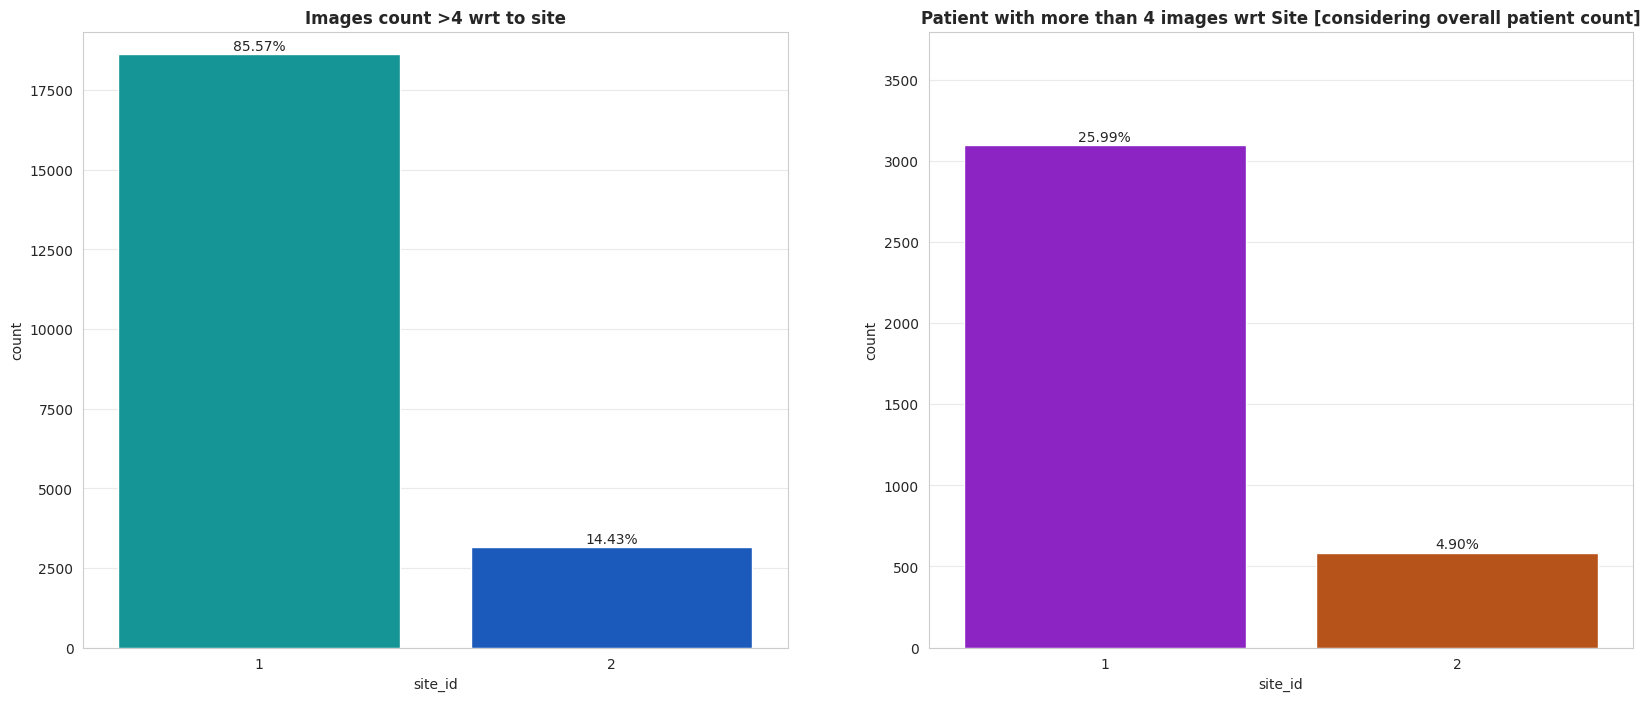

In [30]:
# 1 satır, 2 sütunluk bir grafik oluşturuyoruz
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# İlk grafikte, 'image_df' veri çerçevesindeki 'site_id' sütununa göre resimlerin sayısını çiziyoruz
sns.countplot(data=image_df, x='site_id', palette="winter_r", ax=ax[0])

# İkinci grafikte, 'image_df_drop_dup' veri çerçevesindeki 'site_id' sütununa göre hastaların sayısını çiziyoruz
sns.countplot(data=image_df_drop_dup, x='site_id', palette="gnuplot", ax=ax[1])

# Grafiklerin üzerinde ayarlamalar yapıyoruz
for i, ax in enumerate(ax.flatten()):
    ax.grid(axis='y', linestyle='-', alpha=0.4)  # Y eksenine ızgara ekliyoruz
    
    if i == 0:
        t = image_df.shape[0]  # İlk grafik için toplam resim sayısını alıyoruz
        ax.set_title('Images count >4 wrt to site', fontweight='bold')  # Başlık ekliyoruz
        ax.set_ylim(0, image_df.site_id.value_counts().values[0] + 700)  # Y ekseninin limitlerini ayarlıyoruz
    else:
        t = train.patient_id.nunique()  # İkinci grafik için toplam benzersiz hasta sayısını alıyoruz
        ax.set_ylim(0, image_df_drop_dup.site_id.value_counts().values[0] + 700)  # Y ekseninin limitlerini ayarlıyoruz
        ax.set_title('Patient with more than 4 images wrt Site [considering overall patient count]', fontweight='bold')  # Başlık ekliyoruz

    # Her bir çubuğun üzerine yüzdelik değerleri ekliyoruz
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / t:.2f}%\n'  # Yükseklikten yüzdelik hesaplıyoruz
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')  # Yüzdelik değeri ekliyoruz

# Grafikleri ekranda gösteriyoruz
plt.show()


Hiçbir hasta her iki siteyi de ziyaret etmiyor

Site_1'i ziyaret eden hasta sayısı %48,84 ve site_2'yi ziyaret eden hasta sayısı %51,16

4'ten fazla görüntü için:

Site_1'de site_2'den toplam %71,199 daha fazla görüntü çekilmiştir
Genel Hastalar arasında, site 1'den %25,99 daha fazla 4'ten fazla görüntü çekilmiştir
Genel Hastalar arasında, site 2'den %4,9 daha fazla 4'ten fazla görüntü çekilmiştir
Site_1'i ziyaret eden hasta sayısı yalnızca %2,319 daha fazla olsa da, site_1'de çekilen görüntü sayısında hastalara göre %21,0899'luk bir artış vardır. [Genel hasta sayısı dikkate alındığında]

In [31]:
# 'patient_id' bazında 4'ten fazla resmi olan hastaları filtreliyoruz
false_temp = cancer_false_df[cancer_false_df.patient_id.isin(patient_more_4Img_list)].groupby('patient_id').size().reset_index(name='image_counts')

# 'patient_id' için ilk görülen 'site_id'yi alıyoruz ve 'false_temp' veri çerçevesi ile birleştiriyoruz
s1 = cancer_false_df[['patient_id','site_id']].drop_duplicates(keep='first', subset="patient_id")
false_temp = false_temp.merge(s1, how='inner', on='patient_id')

# 'cancer_status' sütununu 'false' olarak ekliyoruz
false_temp['cancer_status'] = 'false'

# (Yorum satırına alınmış) 'cancer_true_df' veri çerçevesi için benzer işlem yapılabilir
# true_temp = cancer_true_df[cancer_true_df.patient_id.isin(patient_more_4Img_list)].groupby('patient_id').size().reset_index(name='image_counts')
# s2 = cancer_true_df[['patient_id','site_id']].drop_duplicates(keep='first', subset="patient_id")
# true_temp = true_temp.merge(s2, how='inner', on='patient_id')
# true_temp['cancer_status'] = 'true'

# 'completely_cured_df' veri çerçevesi ile işlemi tekrarlıyoruz
cured_temp = completely_cured_df[completely_cured_df.patient_id.isin(patient_more_4Img_list)].groupby('patient_id').size().reset_index(name='image_counts')

# 'patient_id' için ilk görülen 'site_id'yi alıyoruz ve 'cured_temp' veri çerçevesi ile birleştiriyoruz
s3 = completely_cured_df[['patient_id','site_id']].drop_duplicates(keep='first', subset="patient_id")
cured_temp = cured_temp.merge(s3, how='inner', on='patient_id')

# 'cancer_status' sütununu 'completely_cured' olarak ekliyoruz
cured_temp['cancer_status'] = 'completely_cured'

# 'cancer_0_1_0_1_df' veri çerçevesi ile benzer işlemi yapıyoruz
cancer_0_1_0_1_temp = cancer_0_1_0_1_df[cancer_0_1_0_1_df.patient_id.isin(patient_more_4Img_list)].groupby('patient_id').size().reset_index(name='image_counts')

# 'patient_id' için ilk görülen 'site_id'yi alıyoruz ve 'cancer_0_1_0_1_temp' veri çerçevesi ile birleştiriyoruz
s4 = cancer_0_1_0_1_df[['patient_id','site_id']].drop_duplicates(keep='first', subset="patient_id")
cancer_0_1_0_1_temp = cancer_0_1_0_1_temp.merge(s4, how='inner', on='patient_id')

# 'cancer_status' sütununu 'false_tured_true_false_true' olarak ekliyoruz
cancer_0_1_0_1_temp['cancer_status'] = 'false_tured_true_false_true'

# 'cancer_0_0_1_1_df' veri çerçevesi ile benzer işlemi yapıyoruz
cancer_0_0_1_1_temp = cancer_0_0_1_1_df[cancer_0_0_1_1_df.patient_id.isin(patient_more_4Img_list)].groupby('patient_id').size().reset_index(name='image_counts')

# 'patient_id' için ilk görülen 'site_id'yi alıyoruz ve 'cancer_0_0_1_1_temp' veri çerçevesi ile birleştiriyoruz
s5 = cancer_0_0_1_1_df[['patient_id','site_id']].drop_duplicates(keep='first', subset="patient_id")
cancer_0_0_1_1_temp = cancer_0_0_1_1_temp.merge(s5, how='inner', on='patient_id')

# 'cancer_status' sütununu 'false_turned_true' olarak ekliyoruz
cancer_0_0_1_1_temp['cancer_status'] = 'false_turned_true'

# 'cancer_1_0_1_df' veri çerçevesi ile benzer işlemi yapıyoruz
cancer_1_0_1_temp = cancer_1_0_1_df[cancer_1_0_1_df.patient_id.isin(patient_more_4Img_list)].groupby('patient_id').size().reset_index(name='image_counts')

# 'patient_id' için ilk görülen 'site_id'yi alıyoruz ve 'cancer_1_0_1_temp' veri çerçevesi ile birleştiriyoruz
s6 = cancer_1_0_1_df[['patient_id','site_id']].drop_duplicates(keep='first', subset="patient_id")
cancer_1_0_1_temp = cancer_1_0_1_temp.merge(s6, how='inner', on='patient_id')

# 'cancer_status' sütununu 'true_turned_false_true' olarak ekliyoruz
cancer_1_0_1_temp['cancer_status'] = 'true_turned_false_true'

# Tüm geçici veri çerçevelerini birleştiriyoruz
image_count_gr4_df = pd.concat([false_temp, cured_temp, cancer_0_1_0_1_temp, cancer_0_0_1_1_temp, cancer_1_0_1_temp])

# 'site_id' sütununu integer türüne çeviriyoruz
image_count_gr4_df['site_id'] = image_count_gr4_df['site_id'].astype(int)

# Sonuçları gösteriyoruz
image_count_gr4_df


,patient_id,image_counts,site_id,cancer_status
0,25,6,1,false
1,33,5,1,false
2,36,5,2,false
3,49,5,1,false
4,72,5,1,false
...,...,...,...,...
30,53636,7,1,true_turned_false_true
31,57229,6,1,true_turned_false_true
32,59806,5,1,true_turned_false_true
33,62608,8,1,true_turned_false_true


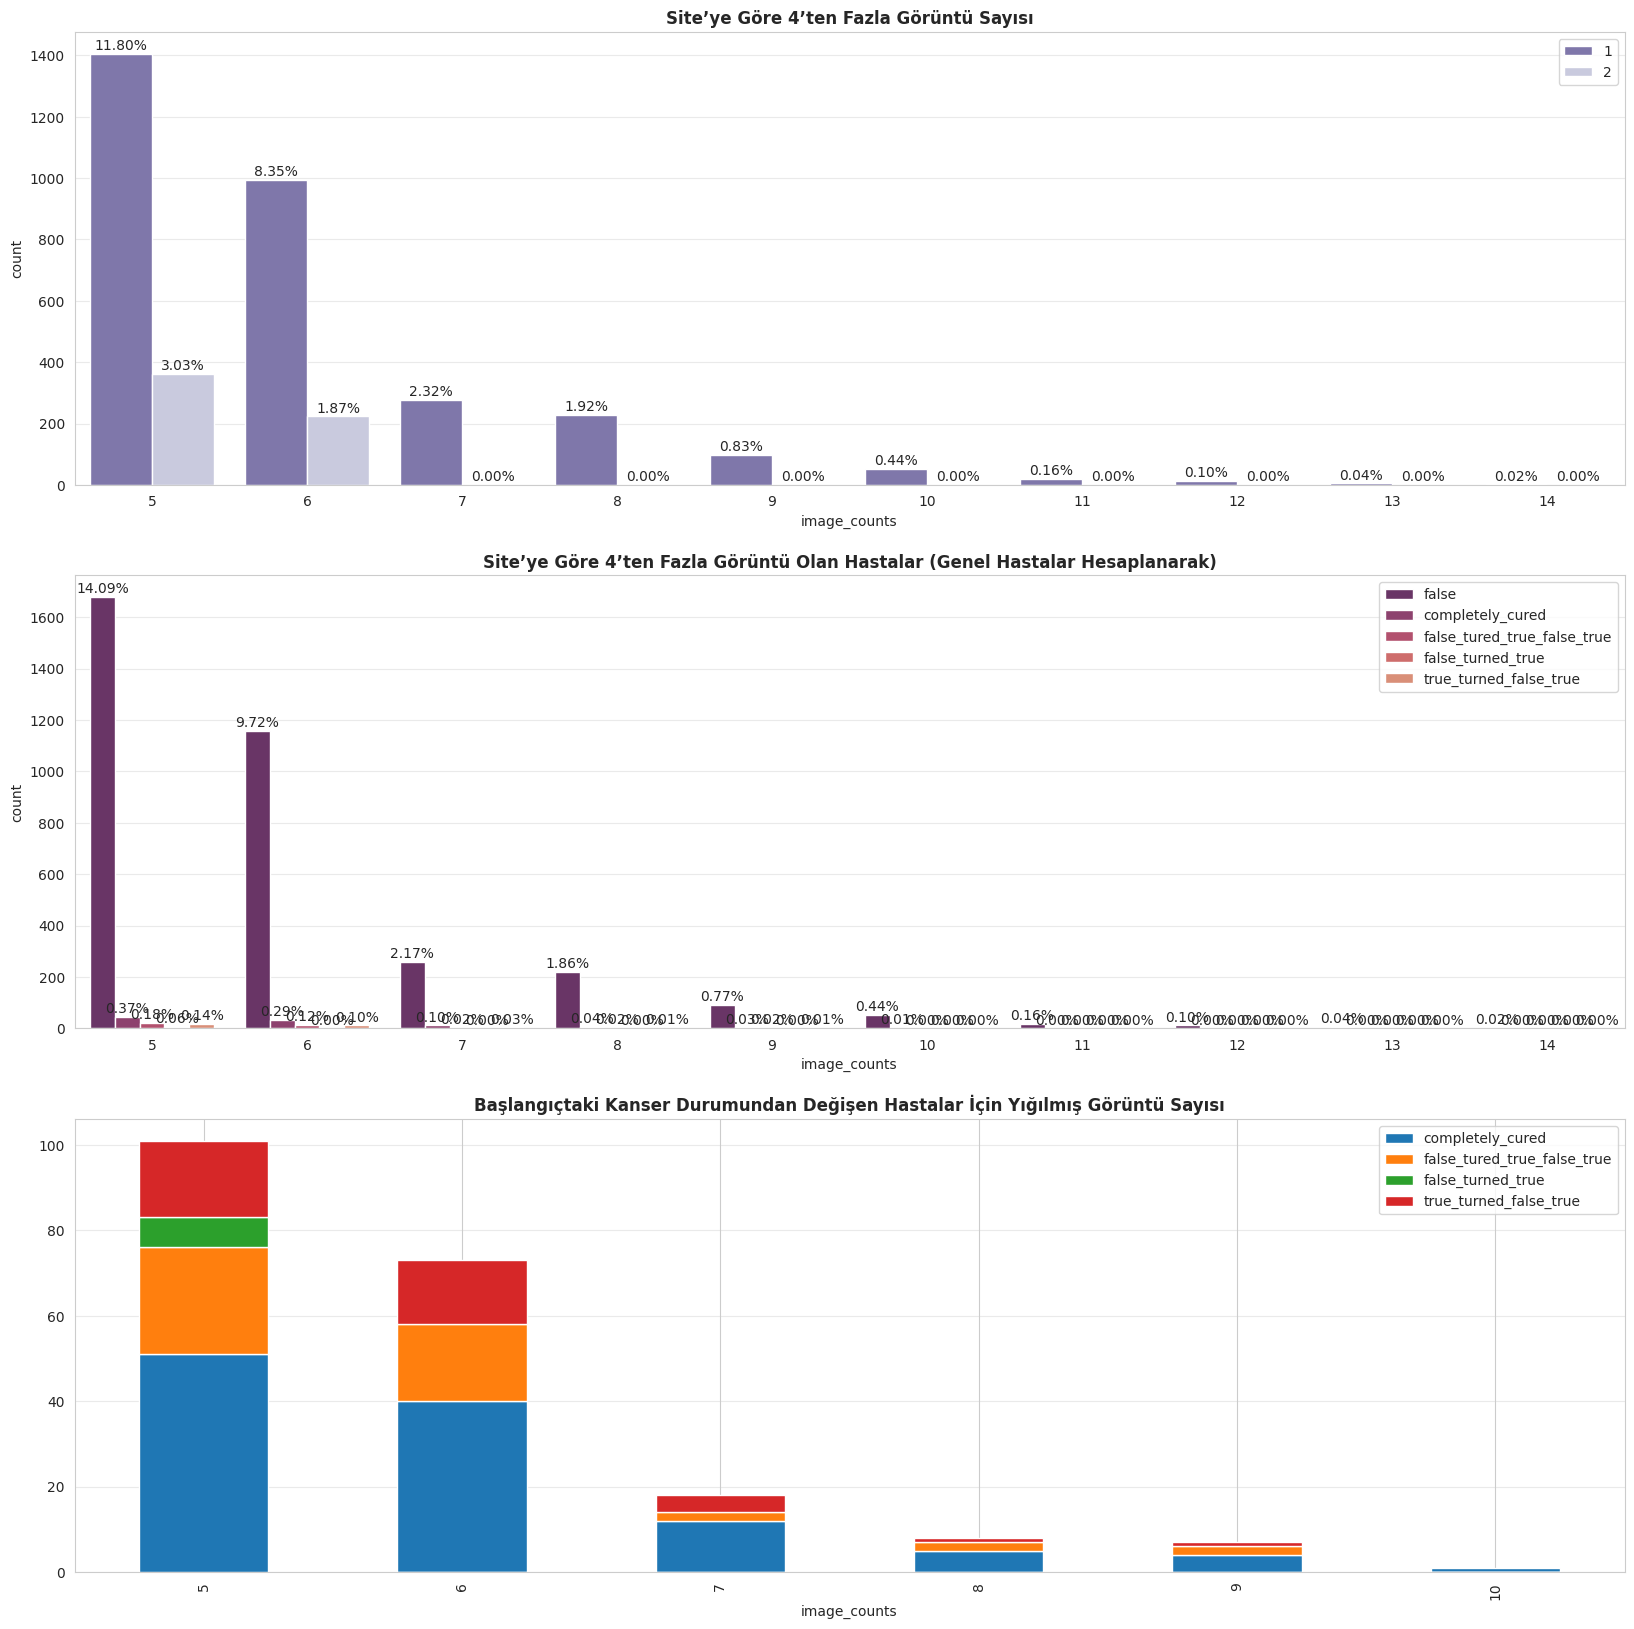

In [32]:
# 'false' olmayan 'cancer_status' değerlerine sahip satırları filtrele
temp = image_count_gr4_df[image_count_gr4_df['cancer_status'] != 'false']

# 'image_counts' ve 'cancer_status' sütunlarına göre veri çerçevesini pivotla
df_pivot = pd.pivot_table(temp, index='image_counts', columns='cancer_status', values='site_id', aggfunc='sum')

# Görselleştirmeler için 3 adet grafik oluştur
fig, ax = plt.subplots(3, 1, figsize=(20,20))

# 1. Grafik: 'image_counts' değerine göre site_id'ye göre countplot
sns.countplot(x='image_counts', hue='site_id', data=image_count_gr4_df, palette="Purples_r", ax=ax[0])
ax[0].set_title('Site’ye Göre 4’ten Fazla Görüntü Sayısı', fontweight='bold')

# 2. Grafik: 'image_counts' değerine göre cancer_status’a göre countplot
sns.countplot(x='image_counts', hue='cancer_status', data=image_count_gr4_df, palette="flare_r", ax=ax[1])
ax[1].set_title('Site’ye Göre 4’ten Fazla Görüntü Olan Hastalar (Genel Hastalar Hesaplanarak)', fontweight='bold')

# 3. Grafik: 'cancer_status' değeri değişmiş hastalar için yığılmış çubuk grafiği
df_pivot.plot.bar(stacked=True, ax=ax[2])
ax[2].set_title('Başlangıçtaki Kanser Durumundan Değişen Hastalar İçin Yığılmış Görüntü Sayısı', fontweight='bold')

# Grafiklerdeki her bir eksende stil ve açıklama ekle
for i, ax in enumerate(ax.flatten()):
    ax.grid(axis='y', linestyle='-', alpha=0.4)  # Y eksenine ızgara ekle
    ax.legend(loc='upper right')  # Grafik üzerinde üst sağ köşeye legend ekle

    # Yalnızca ilk iki grafikte her bir çubuğun üzerine yüzdelik ekle
    if i != 2:
        for p in ax.patches:
            # Yüksekliğin yüzdesini hesapla
            percentage = f'{100 * p.get_height() / t:.2f}%\n'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

# Tüm görselleri göster
plt.show()


laterality

lateralite - Görüntünün sol veya sağ meme olup olmadığı.

görünüm - Görüntünün yönü. Bir tarama muayenesi için varsayılan, meme başına iki görünüm yakalamaktır.

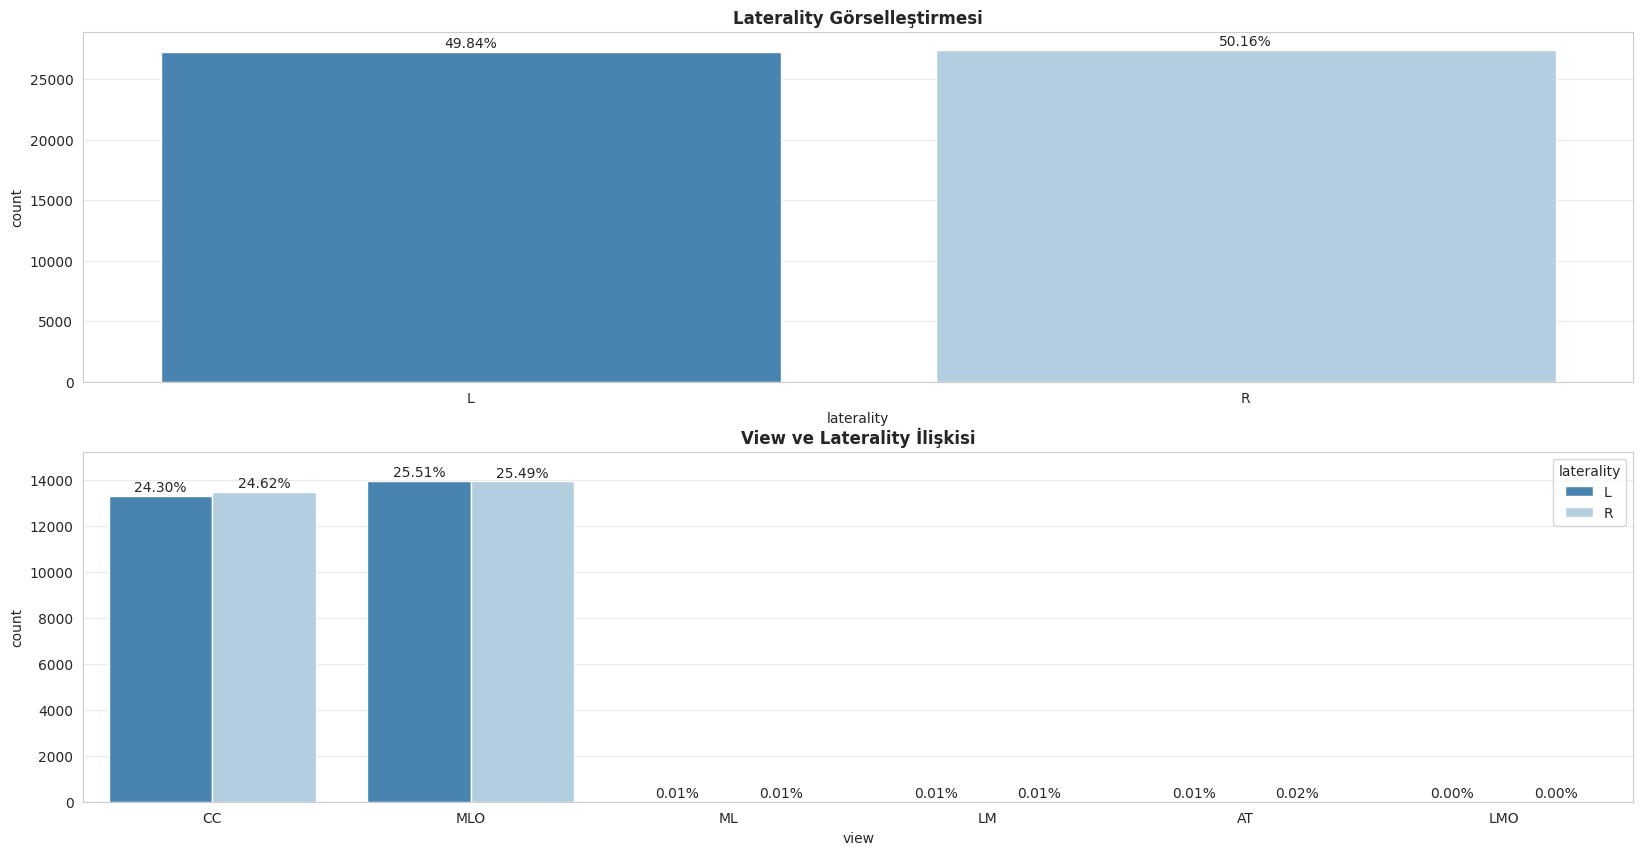

In [33]:
# İki alt grafik oluşturulacak
fig, ax = plt.subplots(2, 1, figsize=(20, 10))  # Grafiklerin yerleşimi

# İlk grafik: 'laterality' sütununun dağılımı
sns.countplot(data=train, x='laterality', palette='Blues_r', ax=ax[0])
# İkinci grafik: 'view' sütununu, 'laterality' sütununa göre ayırarak görselleştiriyoruz
sns.countplot(data=train, x='view', hue='laterality', palette="Blues_r", ax=ax[1])

# Veri boyutunu alıyoruz
t = train.shape[0]

# Her iki grafik için işlemler
for i, ax in enumerate(ax.flatten()):
    # Y ekseninde grid ekliyoruz
    ax.grid(axis='y', linestyle='-', alpha=0.4)
    
    # İlk grafik (laterality) için başlık, Y ekseni sınırları
    if i == 0:
        ax.set_title('Laterality Görselleştirmesi', fontweight='bold')
        ax.set_ylim(0, train.laterality.value_counts().values[0] + 1500)
    
    # İkinci grafik (view ile laterality ilişkisi) için başlık, Y ekseni sınırları
    else:
        ax.set_ylim(0, train.laterality.value_counts().values[0] / 2 + 1500)
        ax.set_title('View ve Laterality İlişkisi', fontweight='bold')
    
    # Her bir çubuğun üzerine yüzde değeri ekliyoruz
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / t:.2f}%\n'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')

# Grafikleri gösteriyoruz
plt.show()


Genel veriler için lateraliteyi kontrol ettiğimizde çok fazla fark yok. Ancak tek görüntü sayısının yaklaşık %18,19'u tek. Bu ikisi arasında bir ilişki olup olmadığını kontrol etmemiz gerekecek?

Veri açıklamasına göre, görünüm görüntünün yönünü sağlar. Bir tarama muayenesi için varsayılan, meme başına iki görünüm yakalamaktır.

Burada MLO'nun %51,01'i ve CC'nin %48,93'ü var ve sol ve sağ lateralite için hemen hemen aynı

ML (medio-lateral görünüm) - %0,01, latero-medial görünüm - %0,02, LMO (lateral-medial oblik) - %0,0018

Belgede belirtildiği gibi dijital mamografi taramasında, her meme tipik olarak iki farklı görünümle görüntülenir, yani mediolateral oblik (MLO) görünüm ve kranial kaudal (CC) görünüm. MLO görünümü göğüsün merkezinden dışarıya doğru çekilirken, CC görünümü göğsün üstünden çekilir. --> Bu da görselleştirmeyle aynı seviyededir.
ML(medio-lateral görünüm) - %0,01, latero-medial görünüm - %0,02, LMO (lateral-medial oblik) - %0,0018

Görüntü sayısına göre lateraliteyi, CC ve ML görünümünü analiz edelim

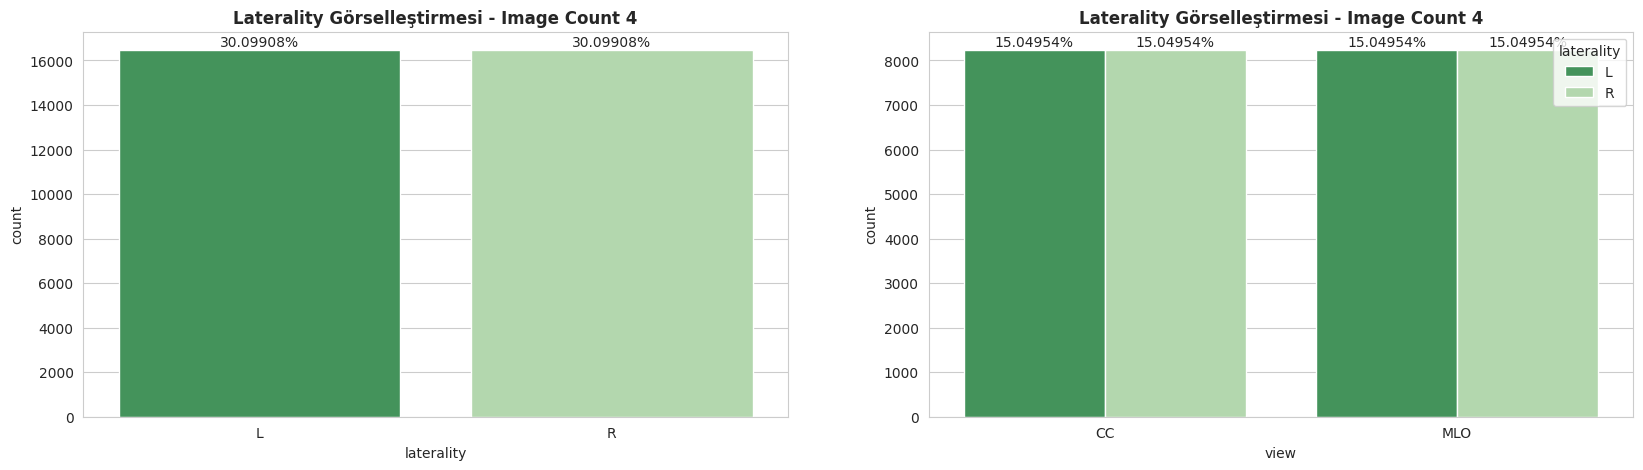

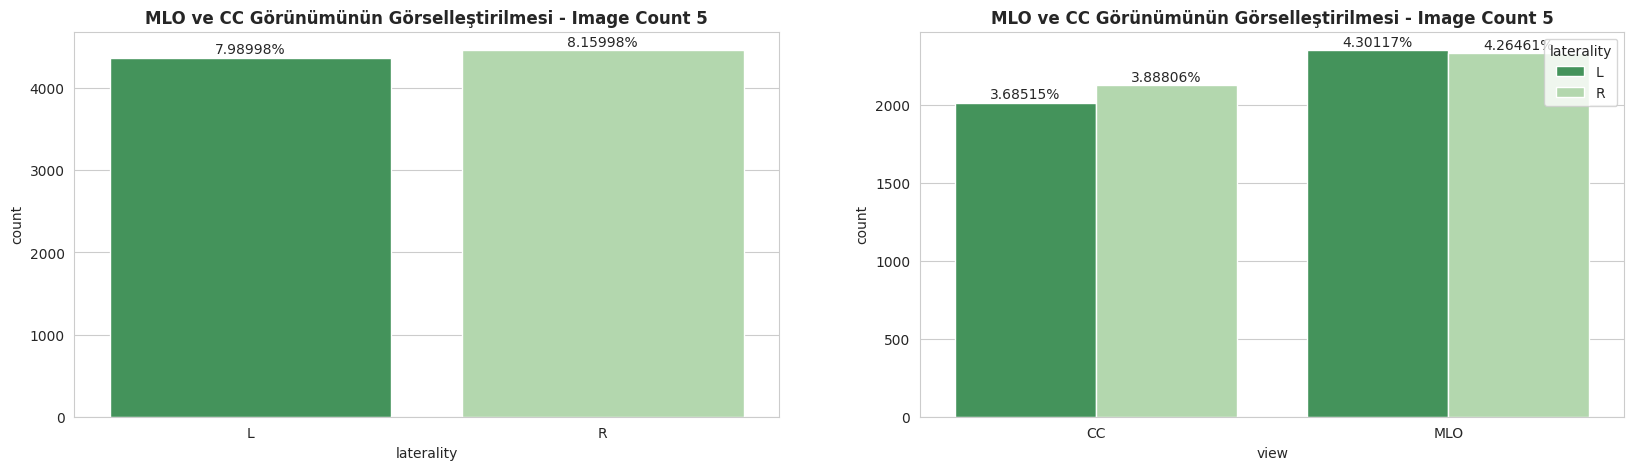

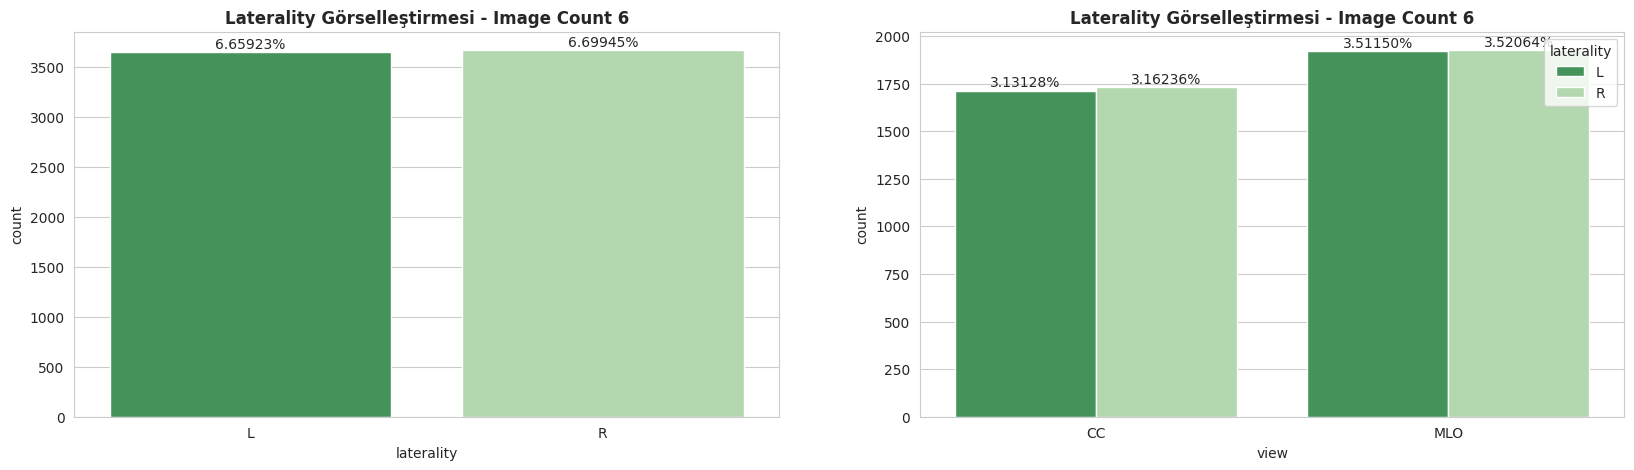

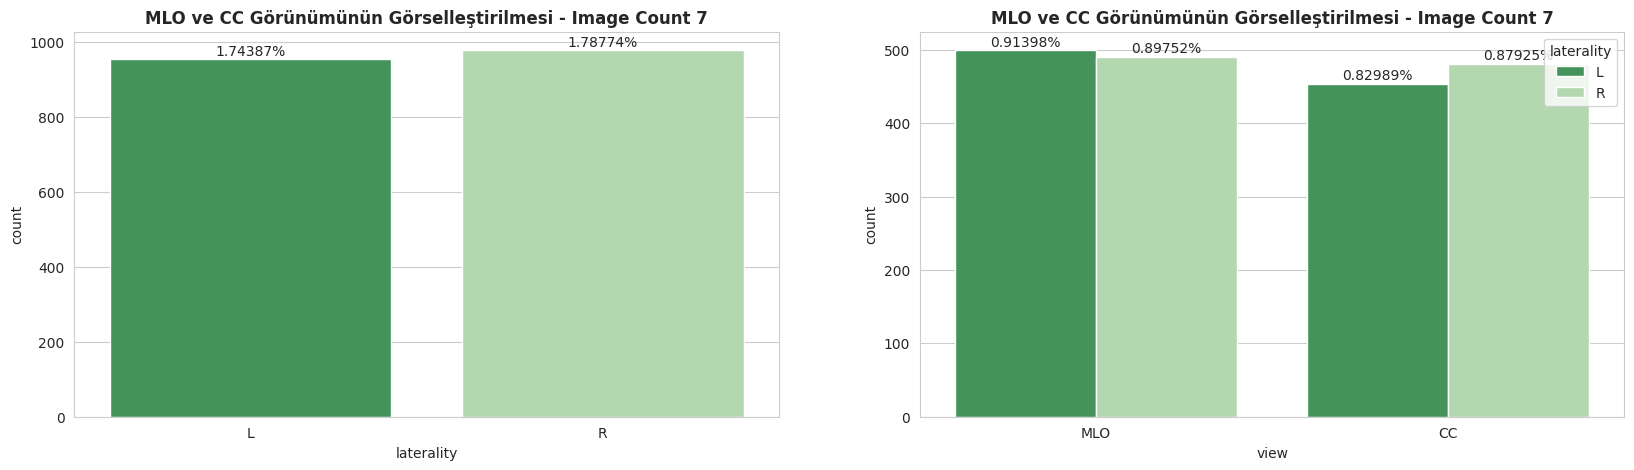

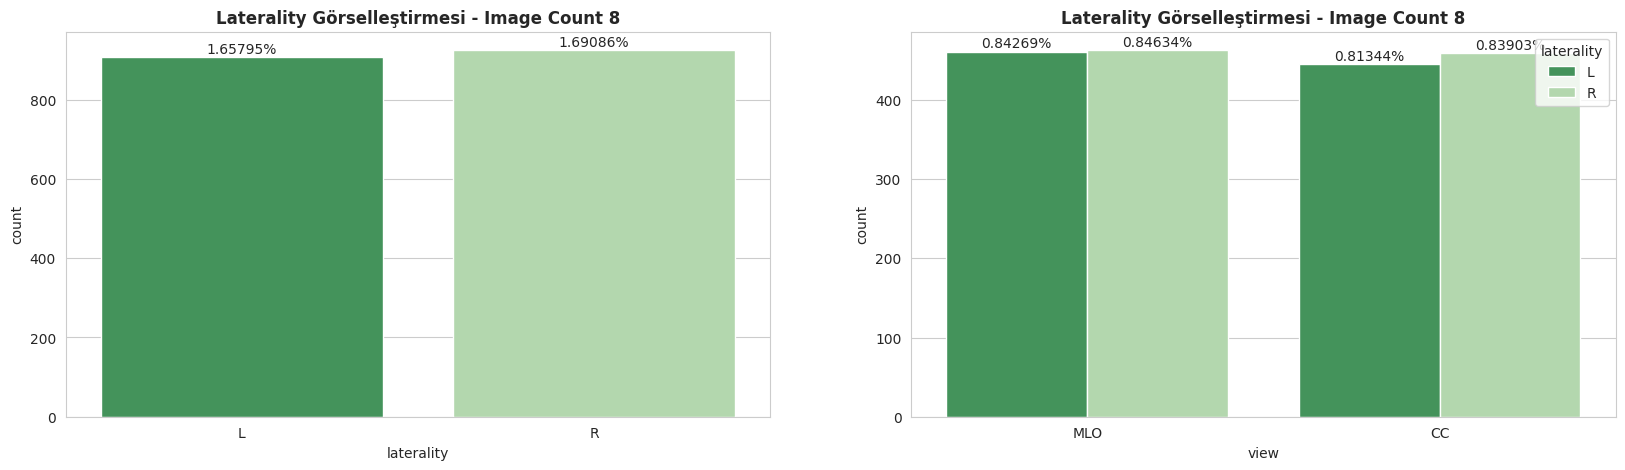

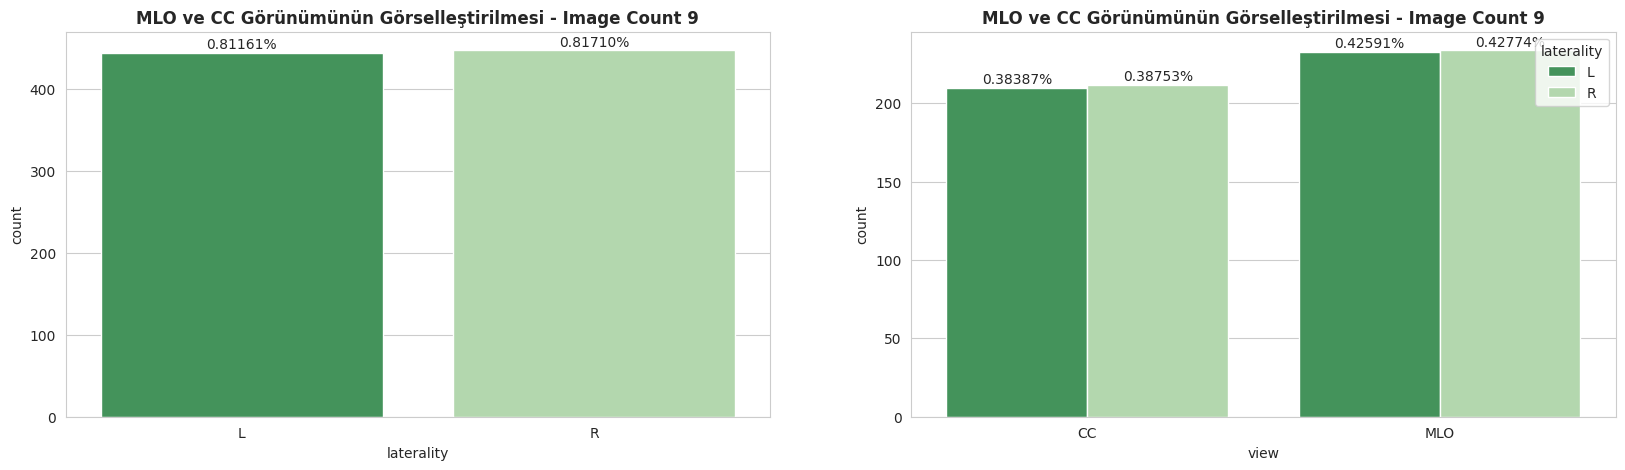

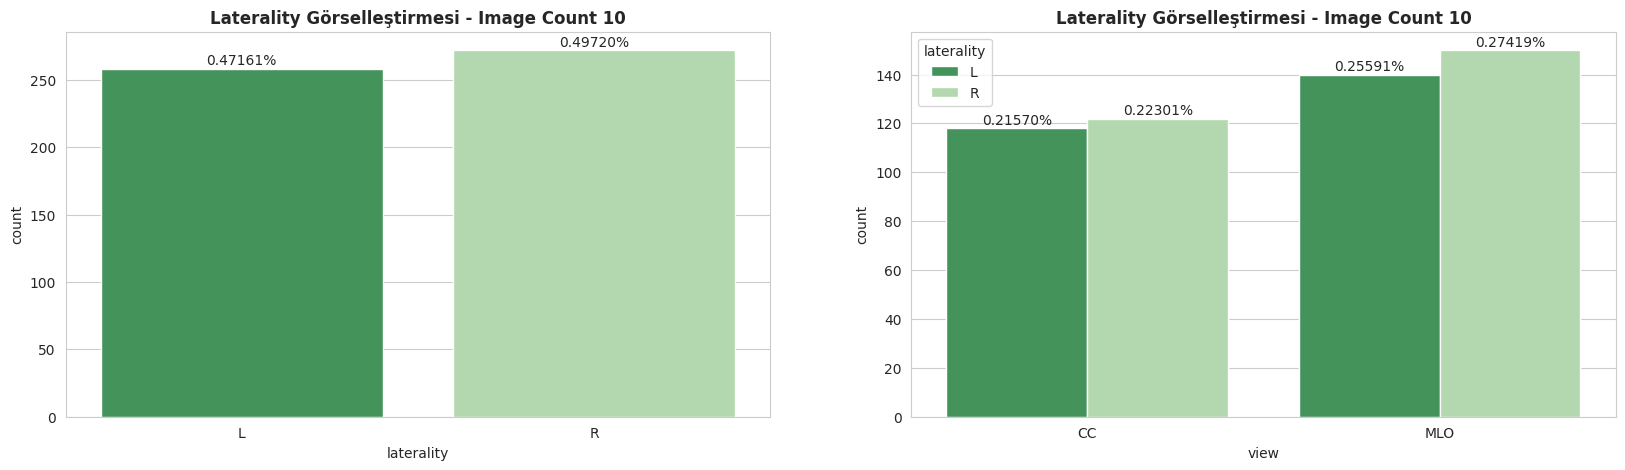

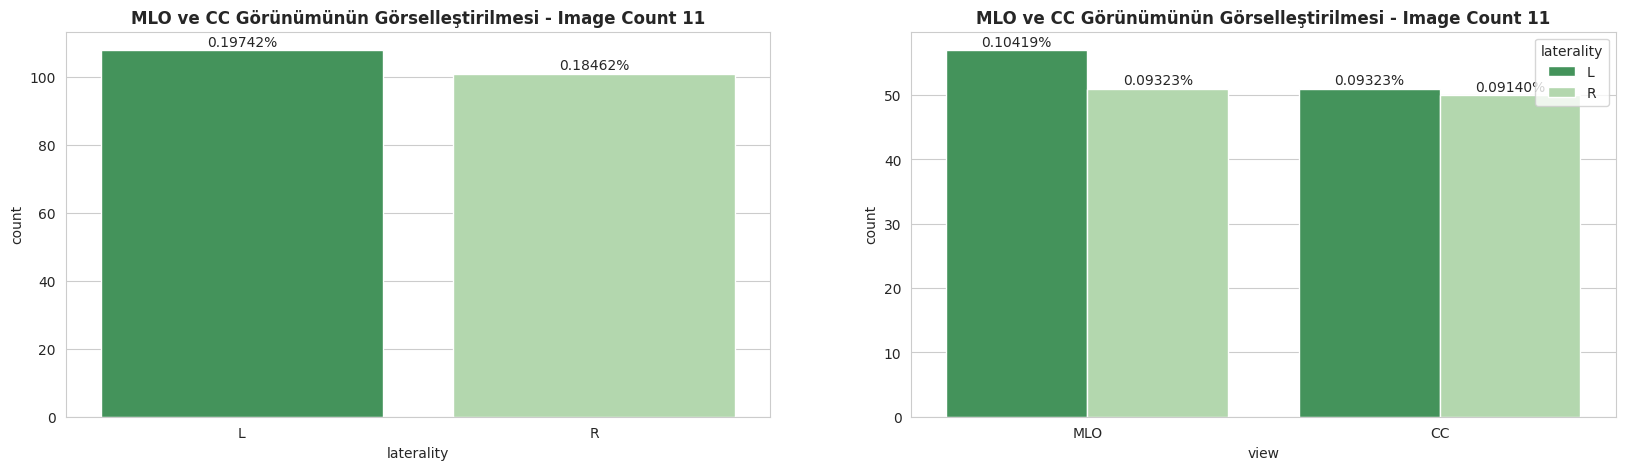

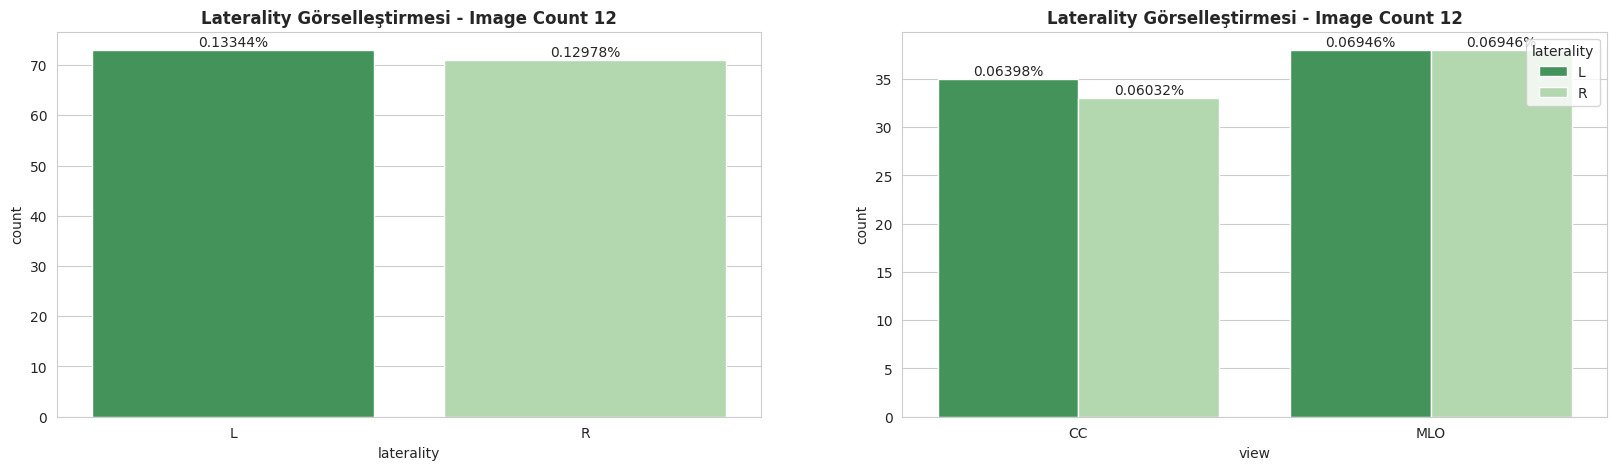

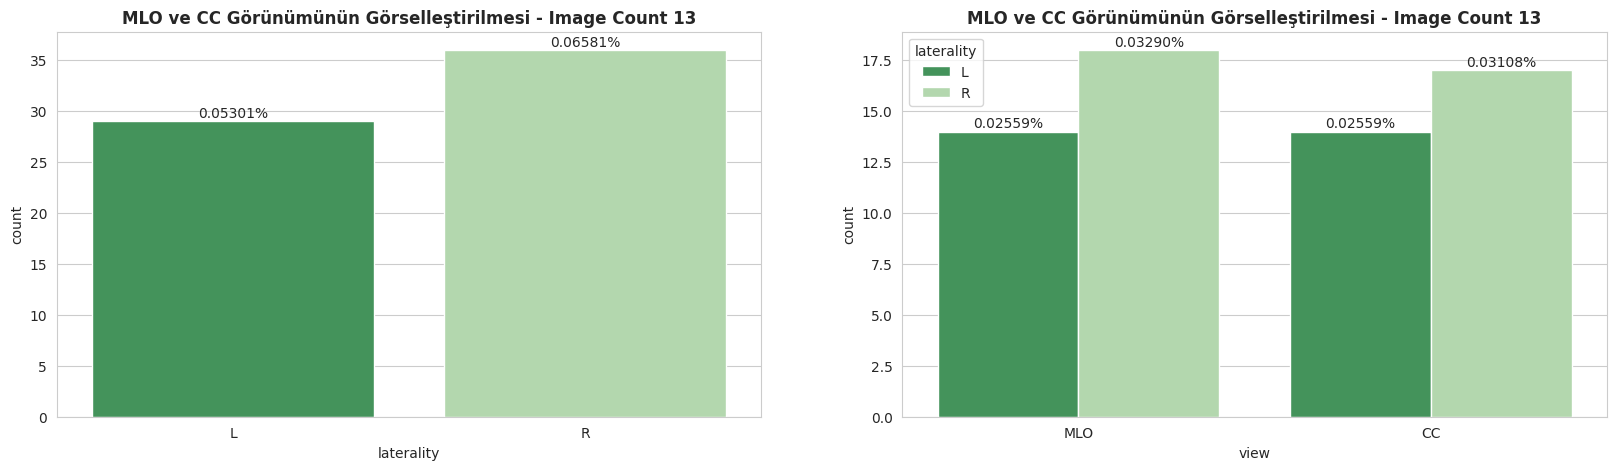

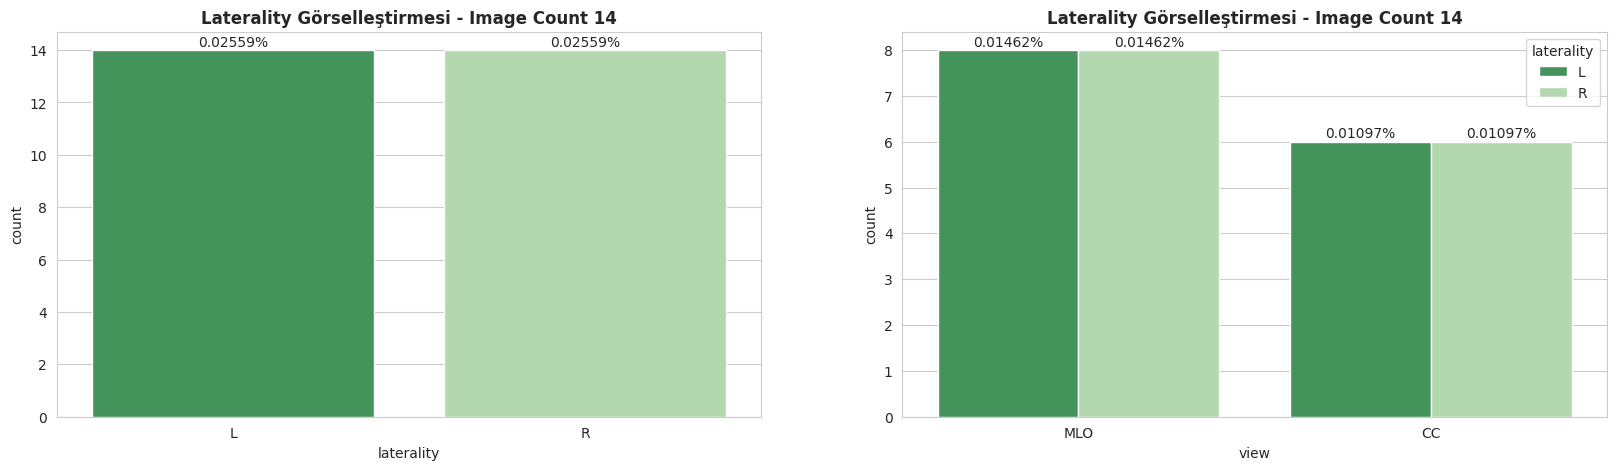

In [34]:
# 'count' sütunundaki her bir benzersiz değeri döngüyle gezerek işlem yapıyoruz
for i in range(len(df['count'].value_counts().index)):
    # 'count' değerine sahip olan hasta ID'lerini alıyoruz
    temp_img_df = train[train['patient_id'].isin(df[df['count'] == df['count'].value_counts().index[i]].index.to_list())]
    
    # MLO ve CC görünümlerine sahip verileri filtreliyoruz
    temp_img_view = temp_img_df[temp_img_df['view'].isin(['MLO', 'CC'])]
    
    # Grafik için bir figür ve iki eksen oluşturuyoruz
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    
    # İlk grafikte 'laterality' sütununun dağılımını görselleştiriyoruz
    sns.countplot(data=temp_img_df, x='laterality', palette='Greens_r', ax=ax[0])
    
    # İkinci grafikte 'view' sütununu, 'laterality' ile birlikte görselleştiriyoruz
    sns.countplot(data=temp_img_view, x='view', hue='laterality', palette="Greens_r", ax=ax[1])
    
    # Veri boyutunu alıyoruz (grafikte yüzde hesaplamak için kullanılacak)
    t = train.shape[0]
   
    # Her iki eksen üzerinde işlemler
    for j, ax in enumerate(ax.flatten()):
        # 'count' değerine bağlı olarak başlıkları ayarlıyoruz
        if i % 2 == 0:
            title = 'Laterality Görselleştirmesi - Image Count ' + str(df['count'].value_counts().index[i])
        else:
            title = 'MLO ve CC Görünümünün Görselleştirilmesi - Image Count ' + str(df['count'].value_counts().index[i])
        
        # Başlığı ayarlıyoruz
        ax.set_title(title, fontweight='bold')
        
        # Her bir çubuğun üzerine yüzde hesaplayıp ekliyoruz
        for p in ax.patches:
            percentage = f'{100 * p.get_height() / t:.5f}%\n'  # Yüzde hesaplama
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')
        
# Tüm grafikleri gösteriyoruz
plt.show()


biopsy

Biyopsi, memede takip biyopsisi yapılıp yapılmadığını gösterir.

In [35]:
# 'cancer' sütununa göre gruplama yapıyoruz ve her grup için 'biopsy' değerlerinin yüzdelik dağılımını hesaplıyoruz
biopsy_percentage_df = train.groupby('cancer').biopsy.value_counts(normalize=True).mul(100).round(2).reset_index(name='biopsy_done_percentage')

# Sonuçları yazdırma
print(biopsy_percentage_df)


   cancer  biopsy  biopsy_done_percentage
0       0       0                   96.62
1       0       1                    3.38
2       1       1                  100.00


Kanser durumu olan hasta Doğru, %100 biyopsi ile yapıldı.

Son durumu olan hastaların sadece %3,38'i Yanlış biyopsi ile yapıldı.

Bu %3,38'lik veriyi anlamak için analiz etmek gerekecek

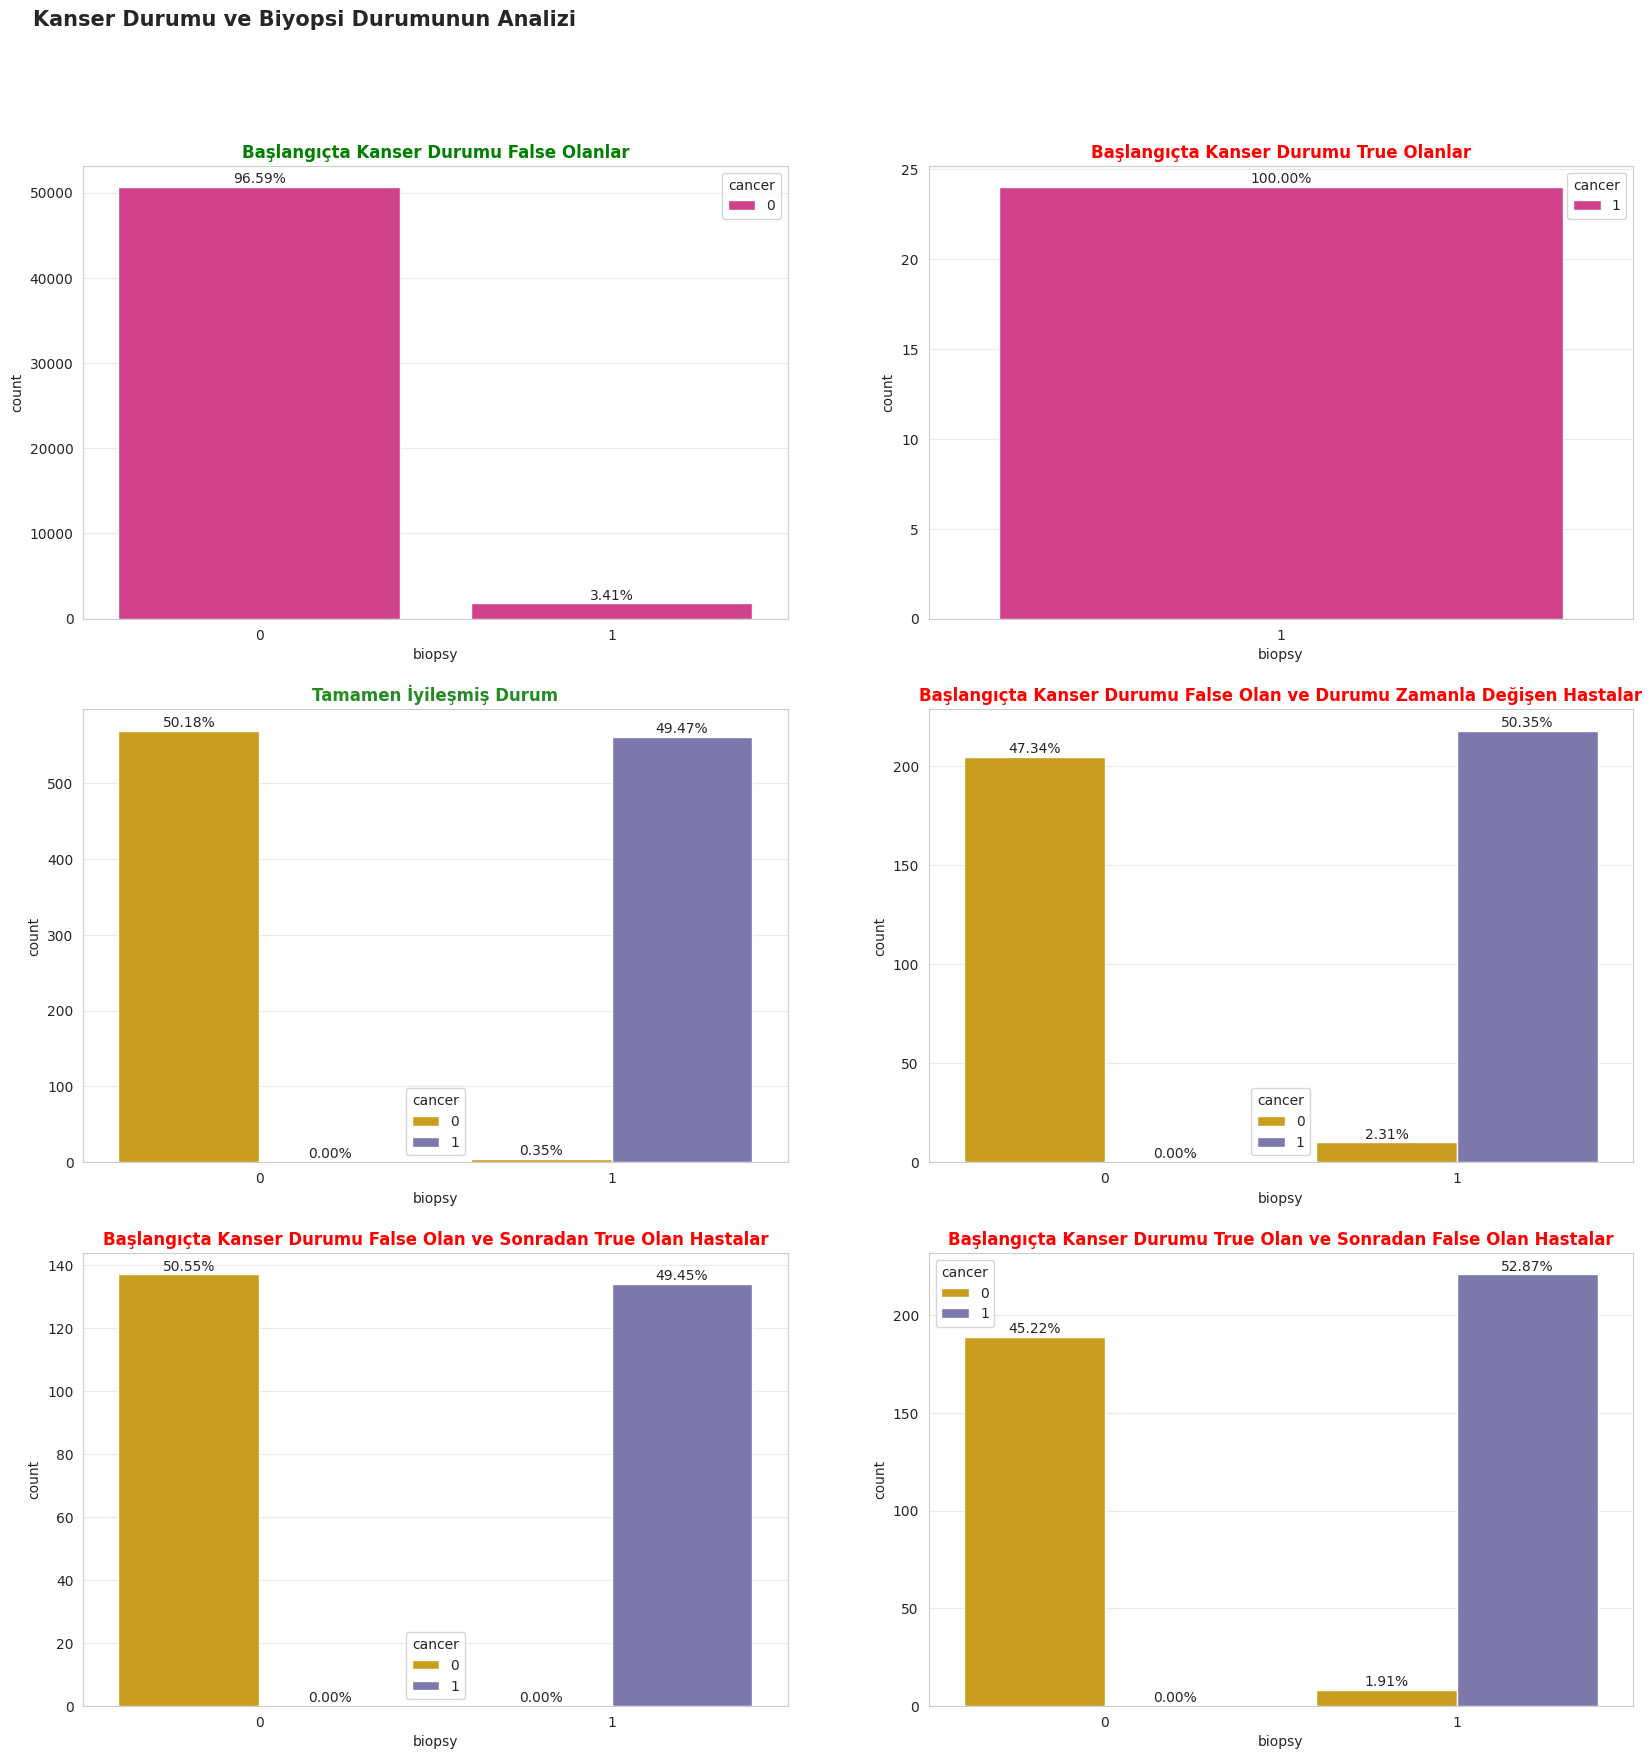

In [36]:
# 3x2 grid şeklinde 6 grafik için bir figür ve eksenler oluşturuyoruz
fig, ax = plt.subplots(3, 2, figsize=(20,20))

# Üst başlık ekliyoruz
fig.text(0.1, 0.95, "Kanser Durumu ve Biyopsi Durumunun Analizi", fontsize=15, fontweight='bold')

# Her bir DataFrame için countplot oluşturuyoruz
sns.countplot(data=cancer_false_df, x='biopsy', hue='cancer', palette='Dark2_r', ax=ax[0, 0])
sns.countplot(data=cancer_true_df, x='biopsy', hue='cancer', palette='Dark2_r', ax=ax[0, 1])
sns.countplot(data=completely_cured_df, x='biopsy', hue='cancer', palette='Dark2_r', ax=ax[1, 0])
sns.countplot(data=cancer_0_1_0_1_df, x='biopsy', hue='cancer', palette='Dark2_r', ax=ax[1, 1])
sns.countplot(data=cancer_0_0_1_1_df, x='biopsy', hue='cancer', palette='Dark2_r', ax=ax[2, 0])
sns.countplot(data=cancer_1_0_1_df, x='biopsy', hue='cancer', palette='Dark2_r', ax=ax[2, 1])

# Her bir grafikte başlıkları ve yüzdeleri ekliyoruz
for i, ax in enumerate(ax.flatten()):
    ax.grid(axis='y', linestyle='-', alpha=0.4)  # Y ekseni için ızgara ekliyoruz
    
    # Her bir grafiğe özel başlık ve renk ayarları yapıyoruz
    if i == 0: 
        ax.set_title('Başlangıçta Kanser Durumu False Olanlar', fontweight='bold', color='green')
        t = cancer_false_df.shape[0]
    elif i == 1: 
        ax.set_title('Başlangıçta Kanser Durumu True Olanlar', fontweight='bold', color='red')
        t = cancer_true_df.shape[0]
    elif i == 2: 
        ax.set_title('Tamamen İyileşmiş Durum', fontweight='bold', color='forestgreen')
        t = completely_cured_df.shape[0]
    elif i == 3: 
        ax.set_title('Başlangıçta Kanser Durumu False Olan ve Durumu Zamanla Değişen Hastalar', fontweight='bold', color='red')
        t = cancer_0_1_0_1_df.shape[0]
    elif i == 4: 
        ax.set_title('Başlangıçta Kanser Durumu False Olan ve Sonradan True Olan Hastalar', fontweight='bold', color='red')
        t = cancer_0_0_1_1_df.shape[0]
    elif i == 5: 
        ax.set_title('Başlangıçta Kanser Durumu True Olan ve Sonradan False Olan Hastalar', fontweight='bold', color='red')
        t = cancer_1_0_1_df.shape[0]
    
    # Grafiklerdeki her çubuğun üzerine yüzde ekliyoruz
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / t:.2f}%\n'  # Yüzde hesaplıyoruz
        ax.annotate(percentage, 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='center')  # Yüzdeleri ekliyoruz

# Tüm grafiklerin gösterilmesi
plt.show()


2.31% Kanser Durumu başlangıçta Yanlış olan, daha sonra Doğru, sonra Yanlış ve Son Olarak Doğru olan Hastalar, Kanser durumu Yanlış olduğunda biyopsi alındı

1.191% Kanser Durumu başlangıçta Doğru olan, daha sonra Yanlış ve Son Olarak Doğru olan Hastalar, Kanser durumu Yanlış olduğunda biyopsi alındı

Başlangıç ​​durumu Yanlış olan ve Doğru olan Hastaların hiçbiri kanser Yanlış durumunda biyopsi alınmadı

invasive

invaziv - Meme kanseri için pozitifse, kanserin invaziv olup olmadığı. Sadece tren için sağlanmıştır.

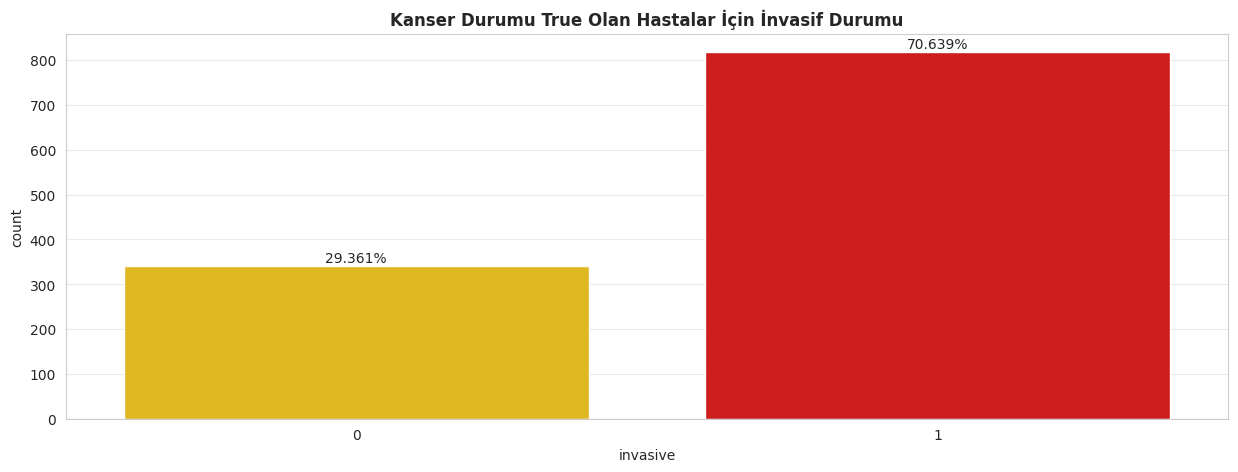

In [37]:
# Kanser durumu True olan hastaların verilerini filtreliyoruz
cancer_true = train[train.cancer == 1]

# Grafik boyutunu ayarlıyoruz
plt.figure(figsize=(15, 5))

# 'invasive' kolonuna göre kanser durumu True olan hastalar için countplot oluşturuyoruz
ax = sns.countplot(data=cancer_true, x='invasive', palette='hot_r')

# Toplam hasta sayısını hesaplıyoruz
t = cancer_true['patient_id'].shape[0]

# Başlık ekliyoruz
ax.set_title('Kanser Durumu True Olan Hastalar İçin İnvasif Durumu', fontweight='bold')

# Grafik üzerindeki her bir çubuğa yüzde değeri ekliyoruz
for p in ax.patches:
    # Çubuğun yüksekliğine göre yüzdeleri hesaplıyoruz
    percentage = f'{100 * p.get_height() / t:.3f}%\n'
    # Çubuğun x ve y koordinatlarını alıyoruz
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Yüzdeyi çubuğun üzerine yerleştiriyoruz
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Y eksenine ızgara çiziyoruz
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Grafiği gösteriyoruz
plt.show()


Kanser hastalarının %70,639'unda invaziv kanser vardır ve bu ciddi bir endişe kaynağıdır.

BIRADS

BIRADS - Memenin takip edilmesi gerekiyorsa 0, memenin kanser açısından negatif olarak derecelendirilmesi durumunda 1 ve memenin normal olarak derecelendirilmesi durumunda 2. Sadece tren için sağlanmıştır.

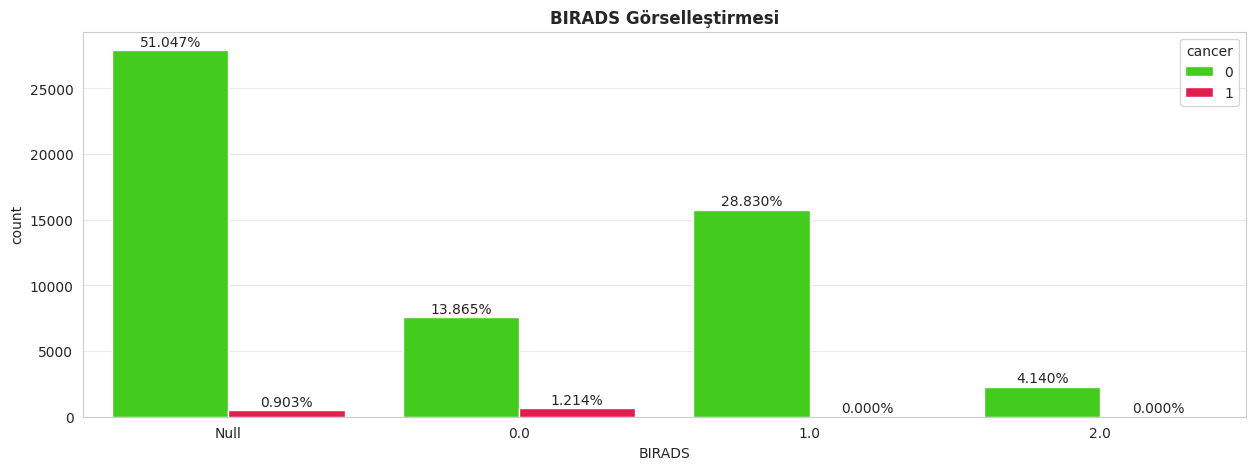

In [38]:
# Grafik boyutunu ayarlıyoruz
plt.figure(figsize=(15, 5))

# Veriyi kopyalıyoruz ve 'BIRADS' sütunundaki eksik (NaN) değerleri 'Null' ile dolduruyoruz
temp = train.copy()
temp.BIRADS.fillna('Null', inplace=True)

# 'BIRADS' sütununa göre kanser durumunu 'hue' ile görselleştiriyoruz
ax = sns.countplot(data=temp, x='BIRADS', hue='cancer', palette='prism')

# Toplam hasta sayısını hesaplıyoruz
t = train.shape[0]

# Başlık ekliyoruz
ax.set_title('BIRADS Görselleştirmesi', fontweight='bold')

# Grafik üzerindeki her bir çubuğa yüzde değeri ekliyoruz
for p in ax.patches:
    # Çubuğun yüksekliğine göre yüzdeleri hesaplıyoruz
    percentage = f'{100 * p.get_height() / t:.3f}%\n'
    # Çubuğun x ve y koordinatlarını alıyoruz
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    # Yüzdeyi çubuğun üzerine yerleştiriyoruz
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Y eksenine ızgara çiziyoruz
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Grafiği gösteriyoruz
plt.show()


In [39]:
train[train.BIRADS.isnull()]['cancer'].value_counts()[0]/train.cancer.value_counts()[0]

0.5215134085306641

Hastaların %4.140'ının memesi normal olarak derecelendirilmiştir ve kanserli Yanlış hastalara aittir

Hastaların %28.230'unun memesi kanser negatif olarak derecelendirilmiştir.

Kanserli gerçek hastaların %42.66'sı ve kanserli yanlış hastaların %52.15'i BIRADS parametresi boştur.

implant

implant - Hastanın meme implantı olup olmadığı. Site 1 sadece hasta düzeyinde meme implantı bilgisi sağlar, meme düzeyinde değil.

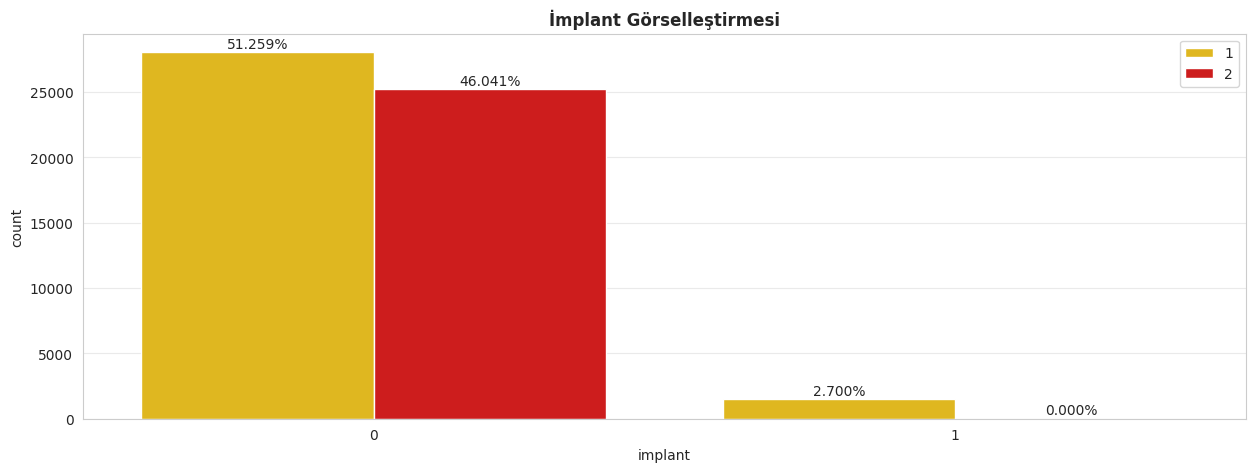

In [40]:
# Grafik boyutunu ayarlıyoruz
plt.figure(figsize=(15,5))

# 'implant' sütunu ile, 'site_id' üzerinde renkli bir histogram çiziyoruz
ax = sns.countplot(data=train, x='implant', hue='site_id', palette='hot_r')

# Toplam satır sayısını alıyoruz
t = train.shape[0]

# Grafiğin başlığını ekliyoruz
ax.set_title('İmplant Görselleştirmesi', fontweight='bold')

# Her çubuğun üzerine yüzdelik değerini ekliyoruz
for p in ax.patches:
    # Yüzdeyi hesaplıyoruz ve formatlıyoruz
    percentage = f'{100 * p.get_height() / t:.3f}%\n'
    
    # X ve Y koordinatlarını belirliyoruz
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    # Yüzdeyi grafikteki çubuğun üzerine yazıyoruz
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Y ekseninde ızgara çizgilerini gösteriyoruz ve opaklık veriyoruz
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Legend'ı sağ üst köşeye yerleştiriyoruz
ax.legend(loc='upper right')

# Grafiği gösteriyoruz
plt.show()


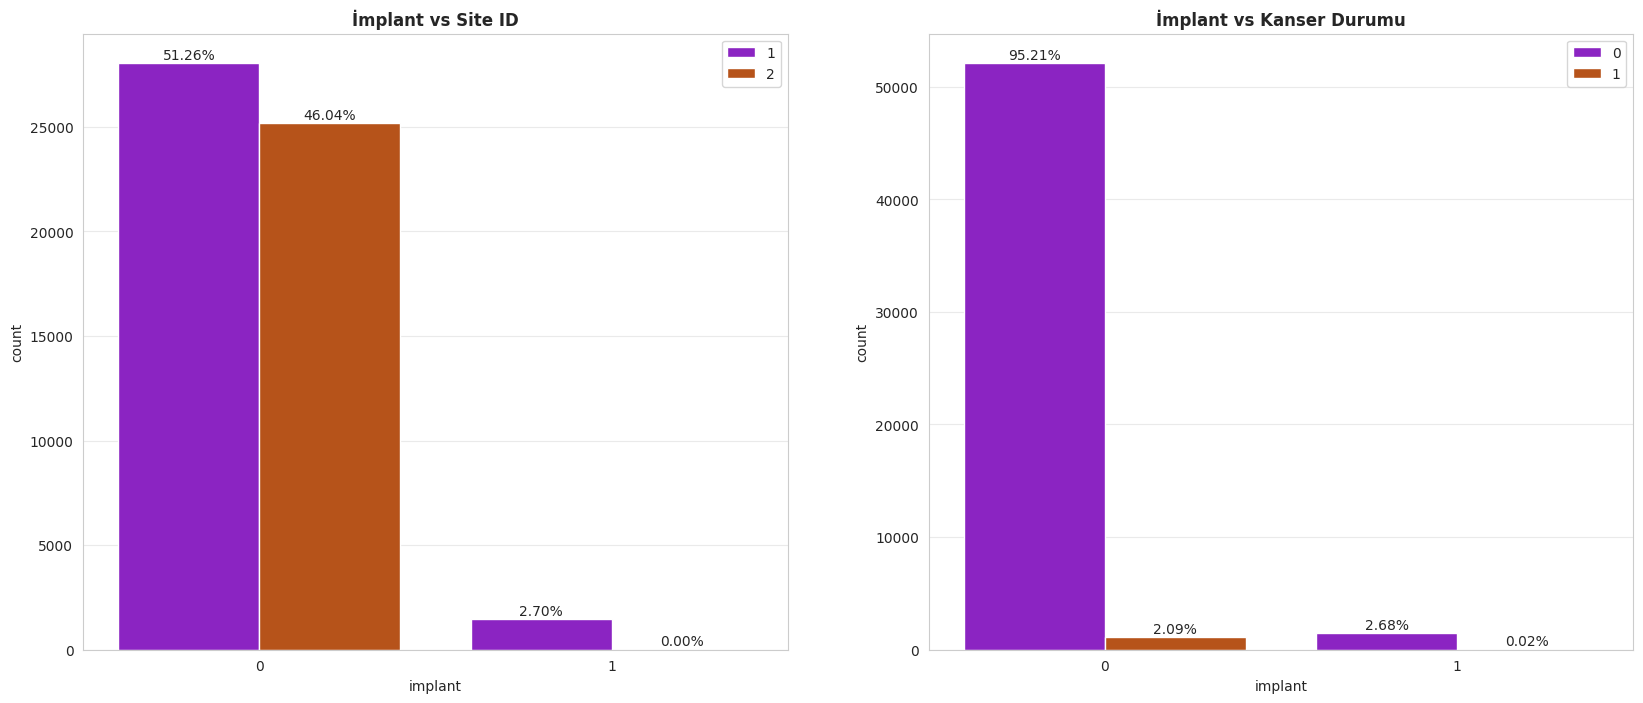

In [41]:
# Grafik için bir figür ve iki eksen oluşturuyoruz
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# İlk grafik: 'implant' ile 'site_id' arasındaki ilişkiyi gösteriyoruz
sns.countplot(data=train, x='implant', hue='site_id', palette='gnuplot', ax=ax[0])

# İkinci grafik: 'implant' ile 'cancer' arasındaki ilişkiyi gösteriyoruz
sns.countplot(data=train, x='implant', hue='cancer', palette='gnuplot', ax=ax[1])

# Toplam satır sayısını alıyoruz
t = train.shape[0]

# Her iki eksende de düzenlemeleri yapıyoruz
for i, ax in enumerate(ax.flatten()):
    # Y ekseninde ızgara çizgilerini gösteriyoruz
    ax.grid(axis='y', linestyle='-', alpha=0.4) 
    
    # İlk grafiğe başlık ekliyoruz
    if i == 0:
        ax.set_title('İmplant vs Site ID', fontweight='bold')
    # İkinci grafiğe başlık ekliyoruz
    else:
        ax.set_title('İmplant vs Kanser Durumu', fontweight='bold')
    
    # Her çubuğun üzerine yüzdelik değeri ekliyoruz
    for p in ax.patches:
        # Yüzdeyi hesaplıyoruz ve formatlıyoruz
        percentage = f'{100 * p.get_height() / t:.2f}%\n'
        
        # X ve Y koordinatlarını belirliyoruz
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center')
    
    # Legend'ı sağ üst köşeye yerleştiriyoruz
    ax.legend(loc='upper right')

# Grafiği gösteriyoruz
plt.show()


İmplant sadece site_id 1'de yapıldı ve sadece %2,7

Yapılan implantın sadece %2,68'i False olarak kanser statüsüne sahipken %0,02'si True olarak

Density

yoğunluk - Meme dokusunun ne kadar yoğun olduğunu belirten bir derecelendirme, A en az yoğun, D ise en yoğun olanıdır. Son derece yoğun doku tanıyı daha zor hale getirebilir.

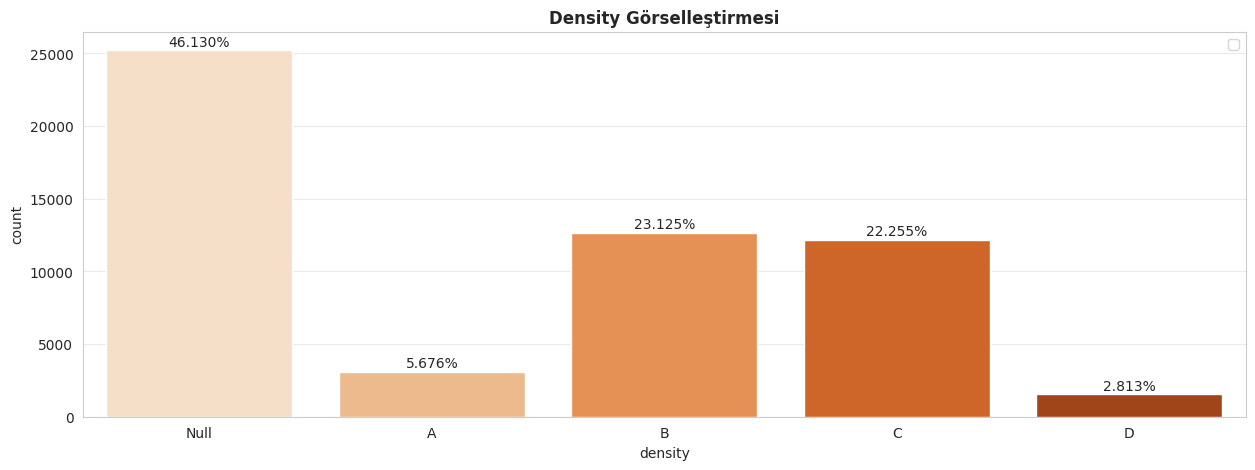

In [42]:
# 'train' DataFrame'inin bir kopyasını oluşturuyoruz ve eksik 'density' değerlerini 'Null' ile dolduruyoruz
temp = train.copy()
temp.density.fillna('Null', inplace=True)

# Grafik boyutunu ayarlıyoruz
plt.figure(figsize=(15,5))

# 'density' sütunu için çubuk grafik çiziyoruz ve sıralamayı 'Null' ile başlatıyoruz
ax = sns.countplot(data=temp, x='density', order=['Null', 'A', 'B', 'C', 'D'], palette='Oranges')

# Toplam satır sayısını alıyoruz
t = train.shape[0]

# Grafiğin başlığını ekliyoruz
ax.set_title('Density Görselleştirmesi', fontweight='bold')

# Her çubuğun üzerine yüzdelik değerini ekliyoruz
for p in ax.patches:
    # Yüzdeyi hesaplıyoruz ve formatlıyoruz
    percentage = f'{100 * p.get_height() / t:.3f}%\n'
    
    # X ve Y koordinatlarını belirliyoruz
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    
    # Yüzdeyi grafikteki çubuğun üzerine yazıyoruz
    ax.annotate(percentage, (x, y), ha='center', va='center')

# Y ekseninde ızgara çizgilerini gösteriyoruz ve opaklık veriyoruz
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Legend'ı sağ üst köşeye yerleştiriyoruz
ax.legend(loc='upper right')

# Grafiği gösteriyoruz
plt.show()


Hastaların %46.1330'unun yoğunluk parametresi sıfırdır

%2.813'ü çok yoğun meme dokusuna sahiptir ve bu da teşhisi zor olacaktır

machine_id

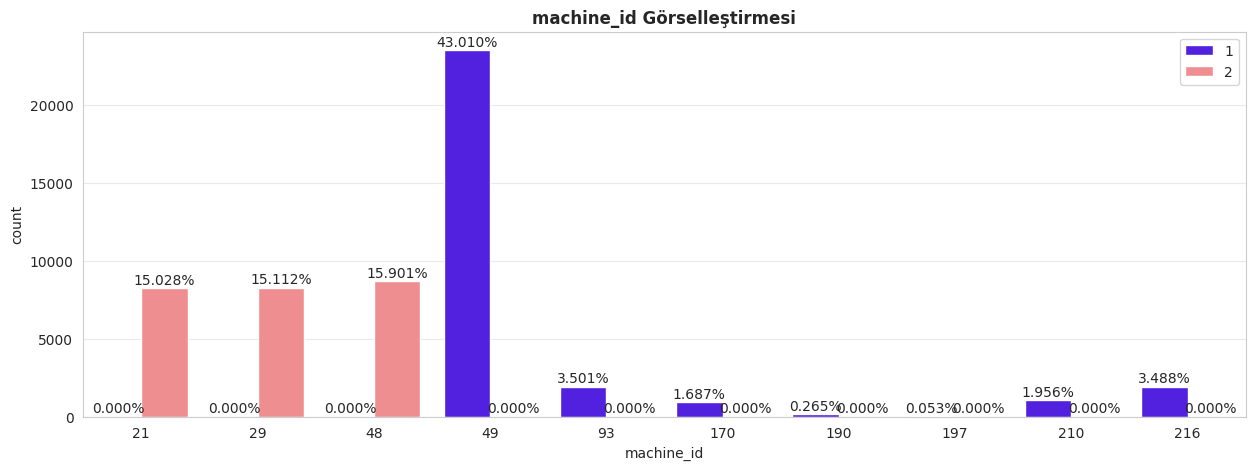

In [43]:
# Grafik boyutunu ayarla
plt.figure(figsize=(15, 5))

# 'machine_id' sütununu site_id'ye göre renklendirerek görselleştir
ax = sns.countplot(data=temp, x='machine_id', hue='site_id', palette='gnuplot2')

# Toplam veri sayısını al
t = train.shape[0]

# Grafik başlığı ekle
ax.set_title('machine_id Görselleştirmesi', fontweight='bold')

# Her çubuğun üzerine yüzde bilgisi yaz
for p in ax.patches:
    yüzde = f'{100 * p.get_height() / t:.3f}%\n'  # Yüzde hesabı
    x = p.get_x() + p.get_width() / 2            # X ekseni konumu
    y = p.get_height()                           # Y ekseni konumu (yükseklik)
    ax.annotate(yüzde, (x, y), ha='center', va='center')  # Yüzdeyi grafiğe ekle

# Y ekseni çizgilerini göster
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Legend (açıklama) konumunu belirle
ax.legend(loc='upper right')

# Grafiği göster
plt.show()


Site_2’de makine ID’leri 21, 29 ve 48, site_1’de ise diğer makineler kullanılıyor. 
Site_1’deki hastaların %79.708’i makine ID’si 49 kullanılarak analiz ediliyor.

difficult_negative_case

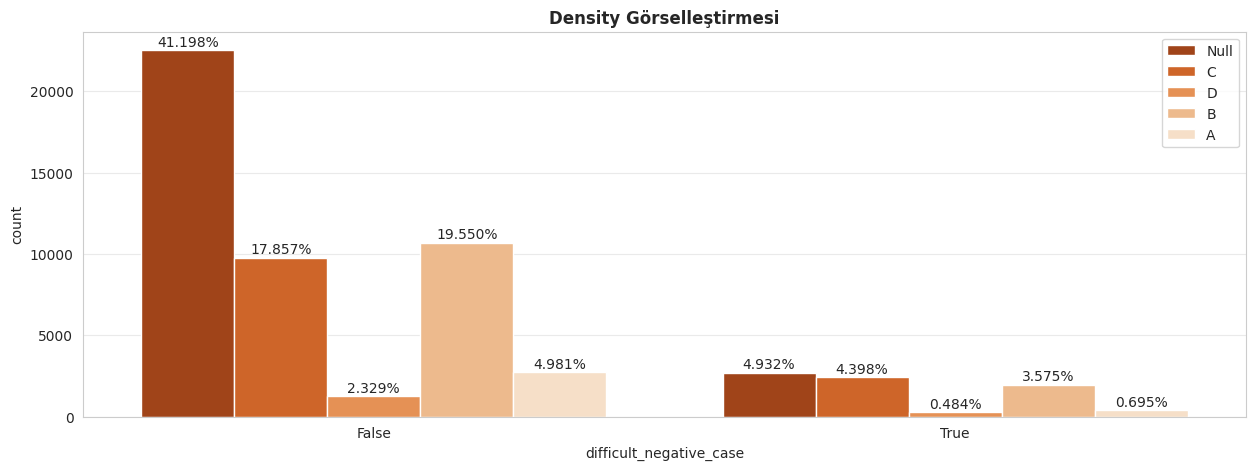

In [44]:
# difficult_negative_case sütunundaki değerlerin dağılımını kontrol et
train.difficult_negative_case.value_counts()

# Veri setinin bir kopyasını al ve eksik density değerlerini 'Null' ile doldur
temp = train.copy()
temp.density.fillna('Null', inplace=True)

# Grafik boyutunu ayarla
plt.figure(figsize=(15, 5))

# difficult_negative_case'e göre gruplandırılmış density dağılımını görselleştir
ax = sns.countplot(data=temp, 
                   x='difficult_negative_case', 
                   hue='density', 
                   palette='Oranges_r')

# Toplam veri sayısını al
t = train.shape[0]

# Grafik başlığını belirle
ax.set_title('Density Görselleştirmesi', fontweight='bold')

# Her çubuğun üstüne yüzde değerini yazdır
for p in ax.patches:
    yüzde = f'{100 * p.get_height() / t:.3f}%\n'  # Yüzdeyi hesapla
    x = p.get_x() + p.get_width() / 2            # Çubuğun orta noktası
    y = p.get_height()                           # Çubuğun yüksekliği
    ax.annotate(yüzde, (x, y), ha='center', va='center')  # Yüzdeyi grafiğe ekle

# Y ekseni çizgilerini göster
ax.grid(axis='y', linestyle='-', alpha=0.4)

# Açıklama kutusunu sağ üst köşeye yerleştir
ax.legend(loc='upper right')

# Grafiği göster
plt.show()
